# Import necessary libraries

In [1]:
# Libraries to help with reading and manipulating data
import pandas as pd
import numpy as np

# Libraries for visualization
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go

# Model metrics for evaluation and data splitting
from sklearn.metrics import explained_variance_score, mean_squared_error, r2_score, mean_absolute_error

from sklearn import metrics

from sklearn.model_selection import train_test_split, cross_val_score


# Hyperparameter tuning
from sklearn.model_selection import RandomizedSearchCV

# Model building
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import (
    AdaBoostRegressor,
    GradientBoostingRegressor,
    RandomForestRegressor,
    BaggingRegressor,
)

# To supress scientific notations for a dataframe
pd.set_option("display.float_format", lambda x: "%.3f" % x)

from xgboost import XGBRegressor

#SHAP
import shap

Using `tqdm.autonotebook.tqdm` in notebook mode. Use `tqdm.tqdm` instead to force console mode (e.g. in jupyter console)


In [2]:
data = pd.read_csv('concrete_data_Kaggle.csv')

In [3]:
data.shape

(1030, 9)

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1030 entries, 0 to 1029
Data columns (total 9 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   cement                         1030 non-null   float64
 1   blast_furnace_slag             1030 non-null   float64
 2   fly_ash                        1030 non-null   float64
 3   water                          1030 non-null   float64
 4   superplasticizer               1030 non-null   float64
 5   coarse_aggregate               1030 non-null   float64
 6   fine_aggregate                 1030 non-null   float64
 7   age                            1030 non-null   int64  
 8   concrete_compressive_strength  1030 non-null   float64
dtypes: float64(8), int64(1)
memory usage: 72.6 KB


In [5]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
cement,1030.000,281.168,104.506,102.000,192.375,272.900,350.000,540.000
blast_furnace_slag,1030.000,73.896,86.279,0.000,0.000,22.000,142.950,359.400
fly_ash,1030.000,54.188,63.997,0.000,0.000,0.000,118.300,200.100
water,1030.000,181.567,21.354,121.800,164.900,185.000,192.000,247.000
superplasticizer,1030.000,6.205,5.974,0.000,0.000,6.400,10.200,32.200
coarse_aggregate,1030.000,972.919,77.754,801.000,932.000,968.000,1029.400,1145.000
fine_aggregate,1030.000,773.580,80.176,594.000,730.950,779.500,824.000,992.600
age,1030.000,45.662,63.170,1.000,7.000,28.000,56.000,365.000
concrete_compressive_strength,1030.000,35.818,16.706,2.330,23.710,34.445,46.135,82.600


In [6]:
data.duplicated().sum()

25

In [7]:
data[data.duplicated()]

,cement,blast_furnace_slag,fly_ash,water,superplasticizer,coarse_aggregate,fine_aggregate,age,concrete_compressive_strength
77,425.000,106.300,0.000,153.500,16.500,852.100,887.100,3,33.400
80,425.000,106.300,0.000,153.500,16.500,852.100,887.100,3,33.400
86,362.600,189.000,0.000,164.900,11.600,944.700,755.800,3,35.300
88,362.600,189.000,0.000,164.900,11.600,944.700,755.800,3,35.300
91,362.600,189.000,0.000,164.900,11.600,944.700,755.800,3,35.300
100,425.000,106.300,0.000,153.500,16.500,852.100,887.100,7,49.200
103,425.000,106.300,0.000,153.500,16.500,852.100,887.100,7,49.200
109,362.600,189.000,0.000,164.900,11.600,944.700,755.800,7,55.900
111,362.600,189.000,0.000,164.900,11.600,944.700,755.800,7,55.900
123,425.000,106.300,0.000,153.500,16.500,852.100,887.100,28,60.290


In [8]:
df = data.copy()
df = data.drop_duplicates()
df.duplicated().sum()

0

In [9]:
df.isnull().sum()

cement                           0
blast_furnace_slag               0
fly_ash                          0
water                            0
superplasticizer                 0
coarse_aggregate                 0
fine_aggregate                   0
age                              0
concrete_compressive_strength    0
dtype: int64

# EDA (Explanatory Data Analysis)

In [10]:
# function to plot a boxplot and a histogram along the same scale.

def hist_boxplot(data, feature, figsize = (12,7),kde = True, bins=None):
    f2, (ax_box2, ax_hist2) = plt.subplots(
        nrows = 2,
        sharex= True,
        gridspec_kw ={'height_ratios': (0.25,0.75)},
        figsize = figsize)
    sns.boxplot(data=data, x =feature, ax = ax_box2, showmeans = True, color = 'violet')

    if bins:
        sns.histplot(data=data, x =feature, kde = kde, ax = ax_hist2, bins=bins, palette = 'winter')

    else:
        sns.histplot(data=data, x =feature, kde = kde, ax = ax_hist2, palette = 'winter')
    ax_hist2.axvline(data[feature].mean(), color = 'green', linestyle = "--")
    ax_hist2.axvline(data[feature].median(), color = 'black', linestyle = "-")

Ignoring `palette` because no `hue` variable has been assigned.
Ignoring `palette` because no `hue` variable has been assigned.
Ignoring `palette` because no `hue` variable has been assigned.
Ignoring `palette` because no `hue` variable has been assigned.
Ignoring `palette` because no `hue` variable has been assigned.
Ignoring `palette` because no `hue` variable has been assigned.
Ignoring `palette` because no `hue` variable has been assigned.
Ignoring `palette` because no `hue` variable has been assigned.
Ignoring `palette` because no `hue` variable has been assigned.


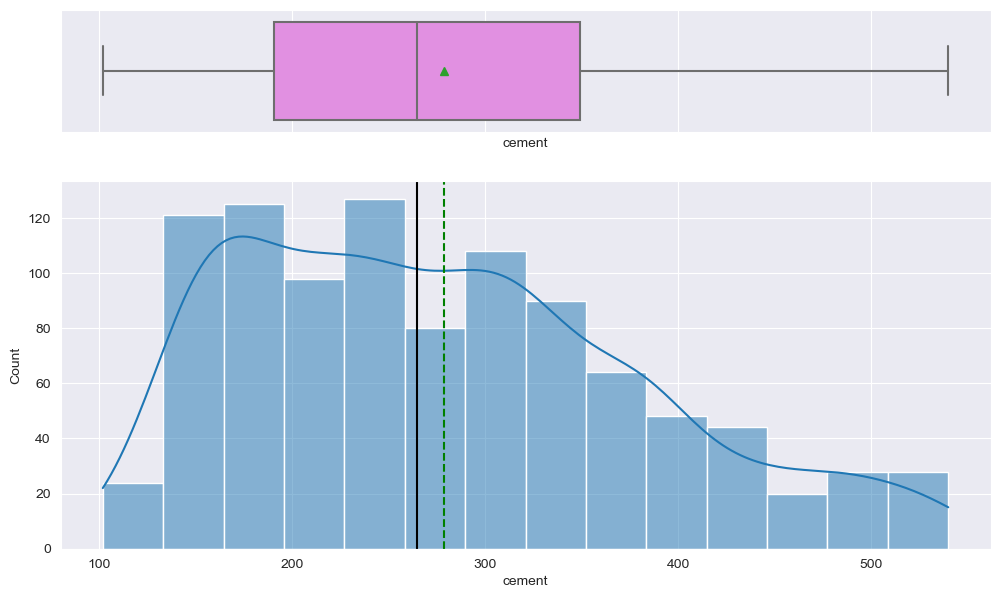

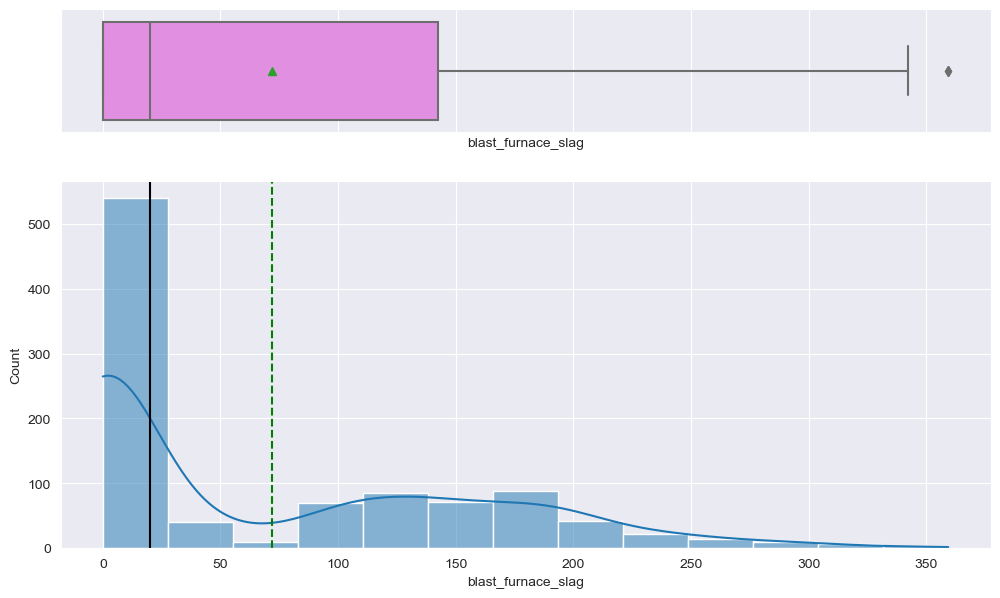

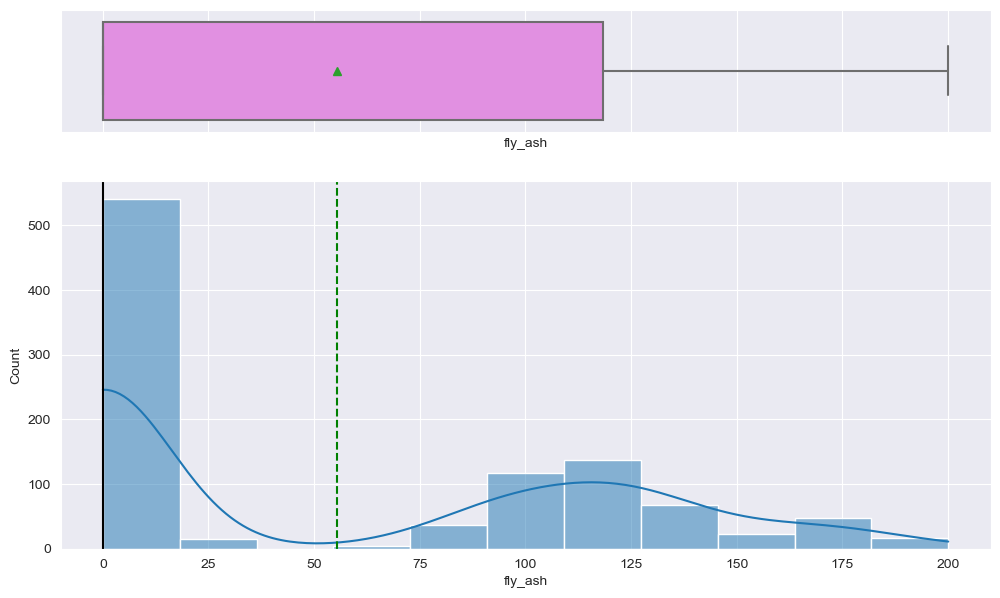

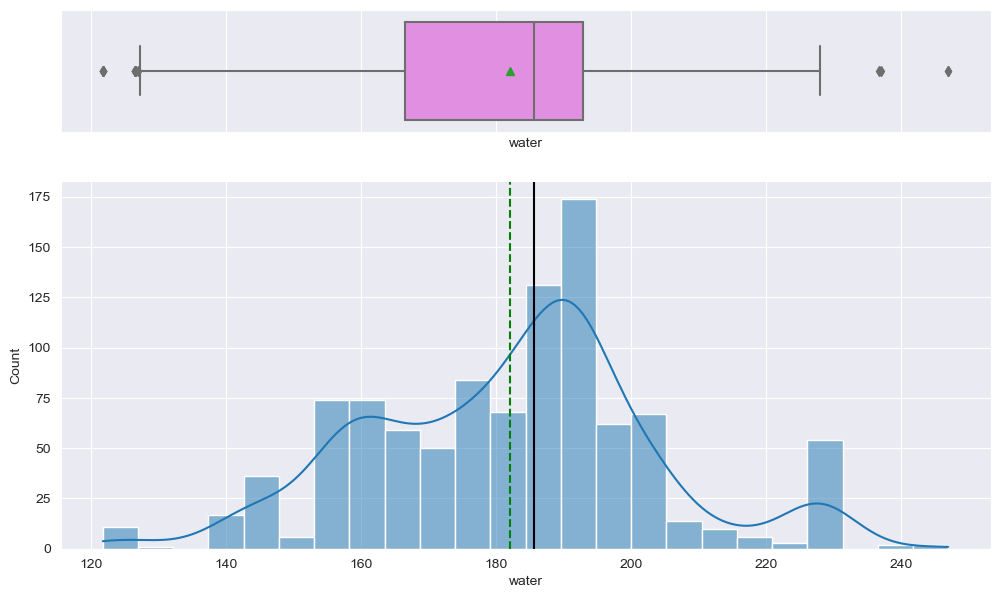

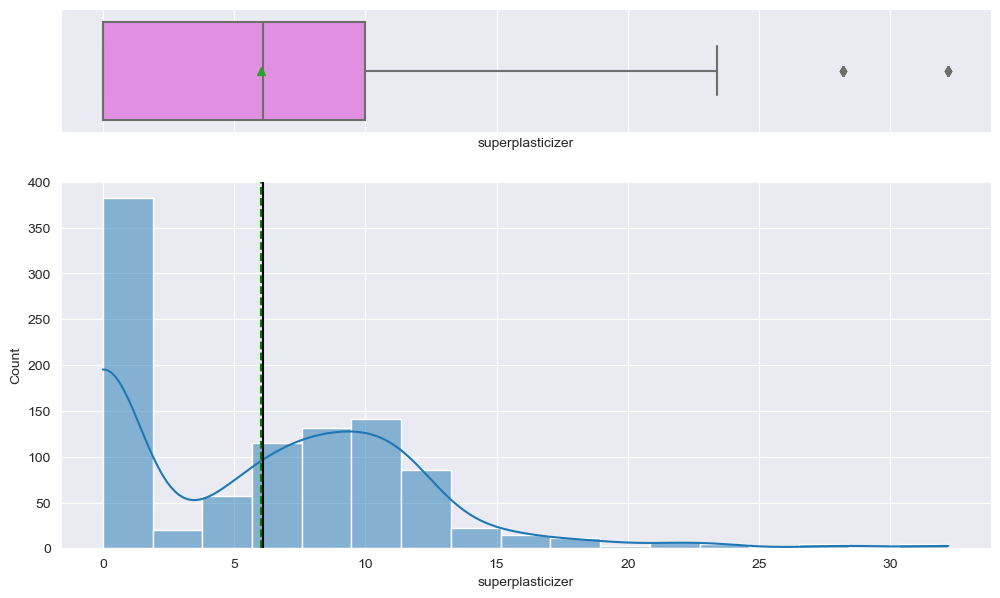

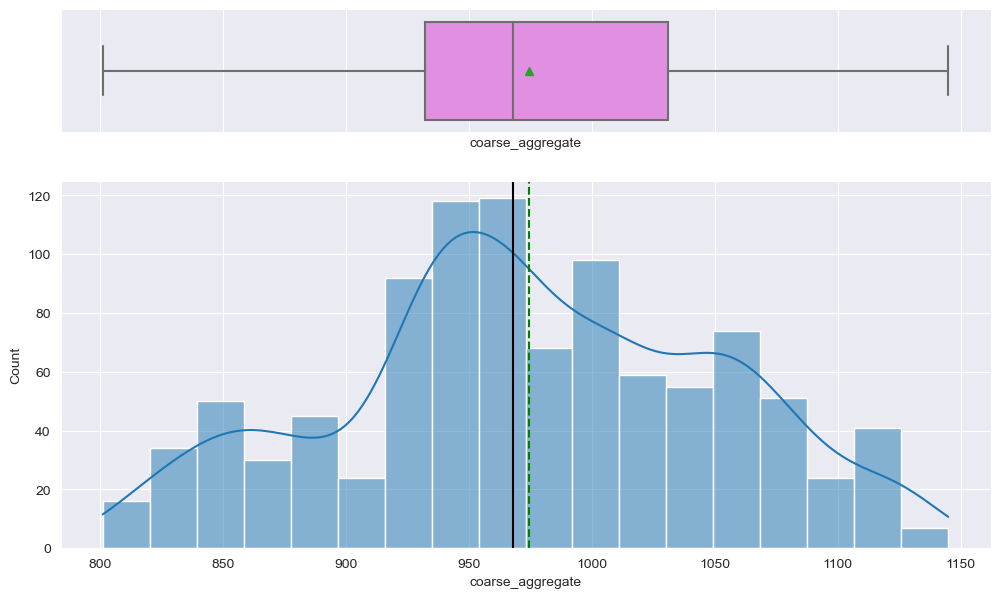

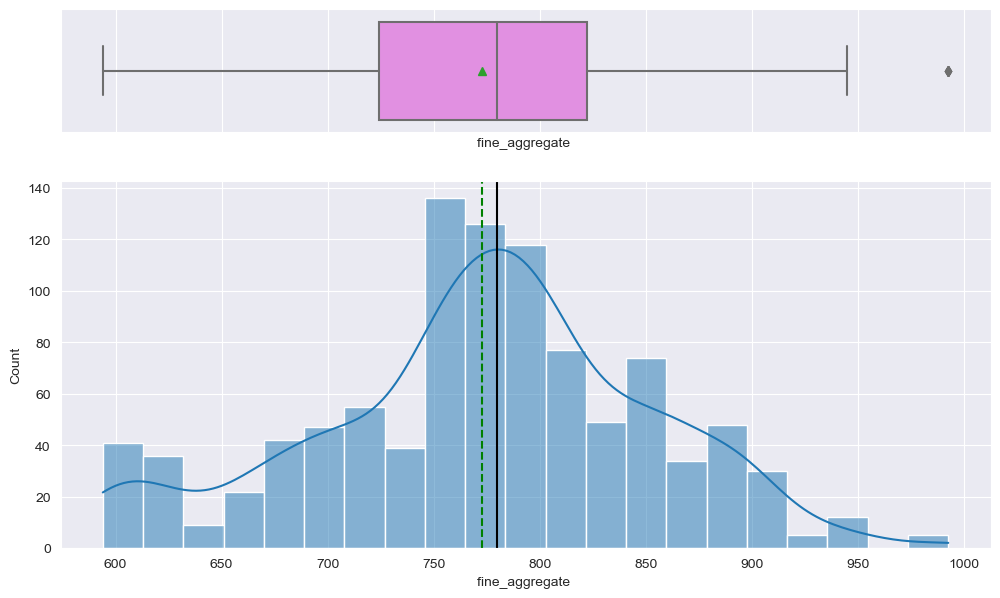

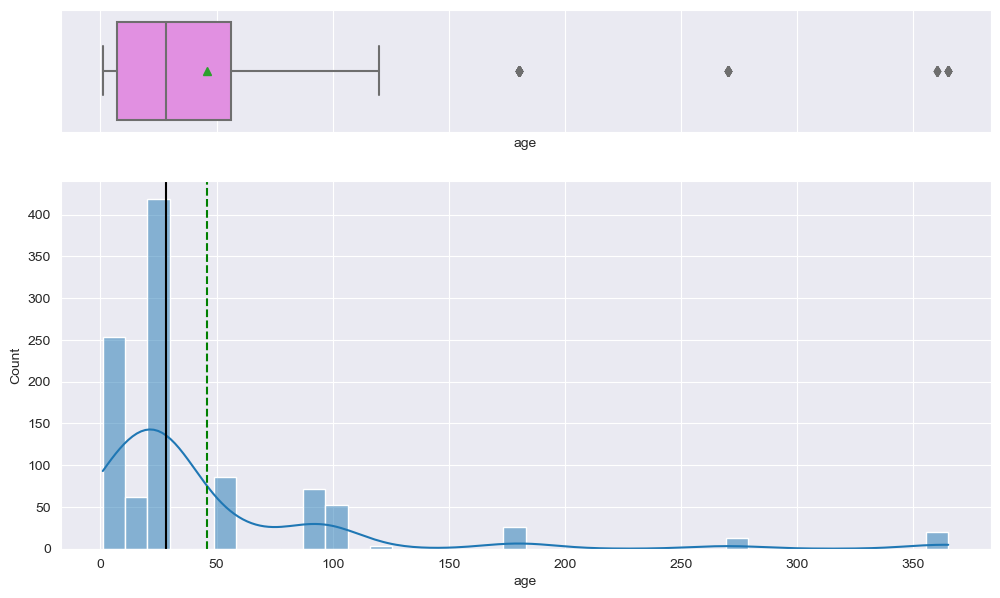

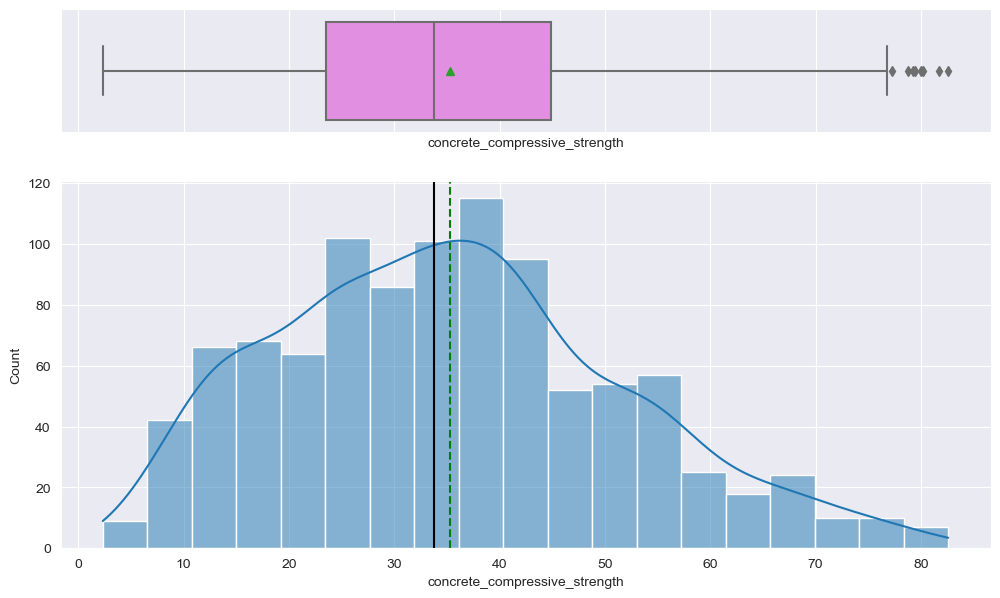

In [11]:
for i in df.columns:
    hist_boxplot(df, i)

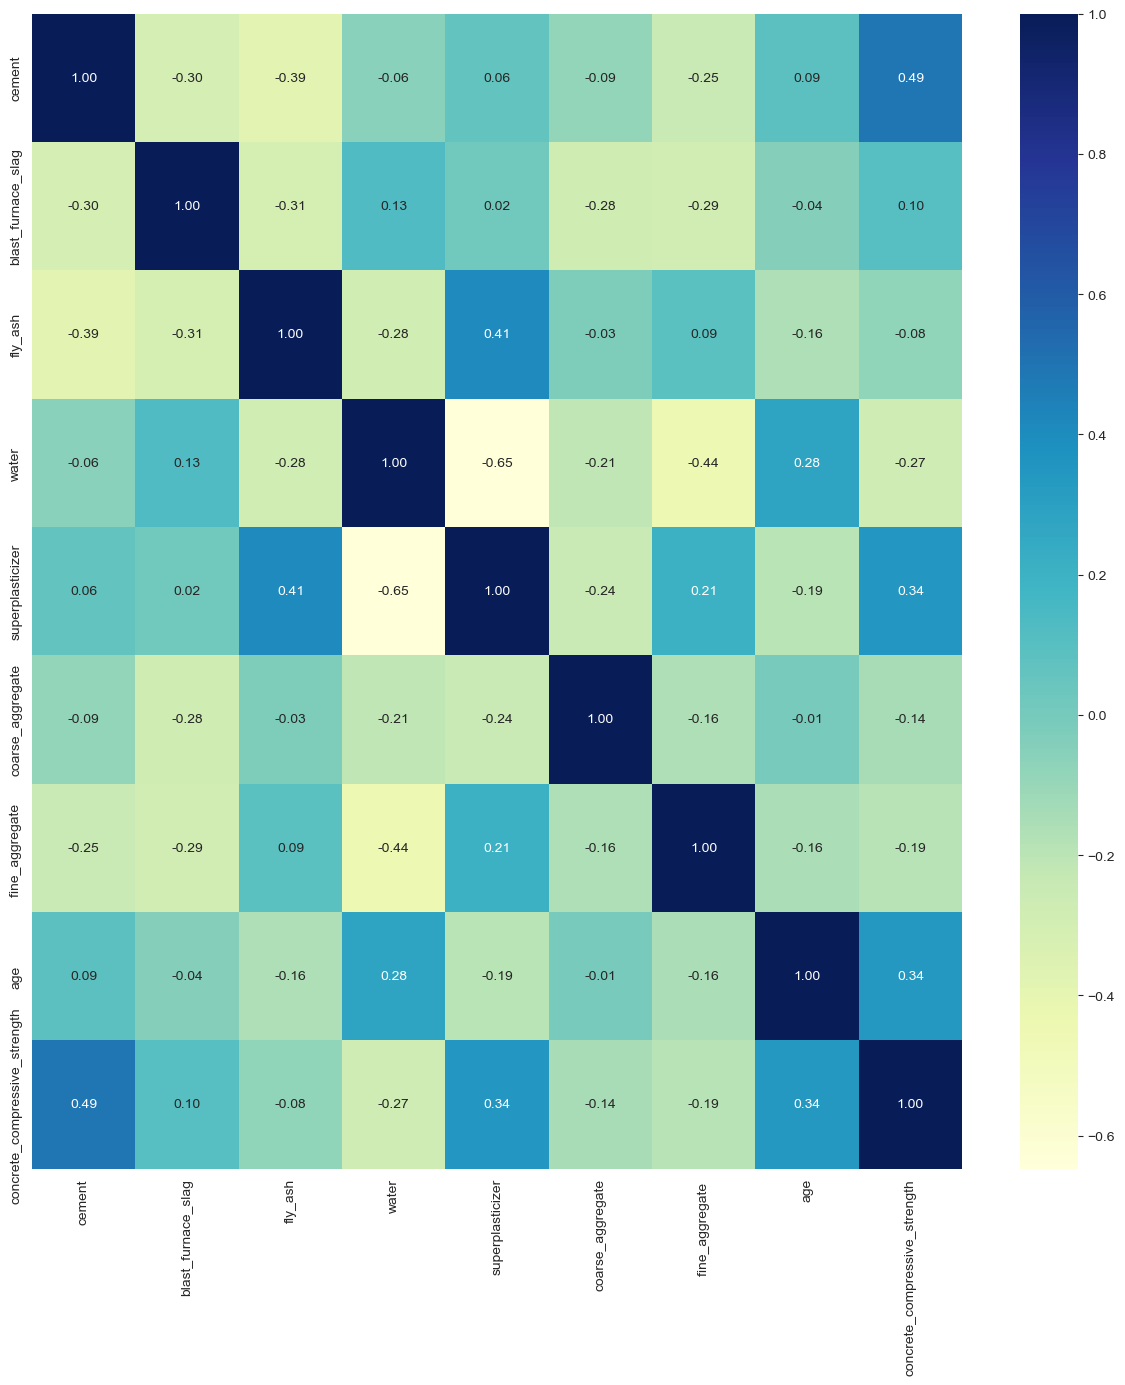

In [12]:
plt.figure(figsize= (15, 15))
sns.heatmap(df.corr(), annot = True, fmt = '.2f', cmap = 'YlGnBu')
plt.show()

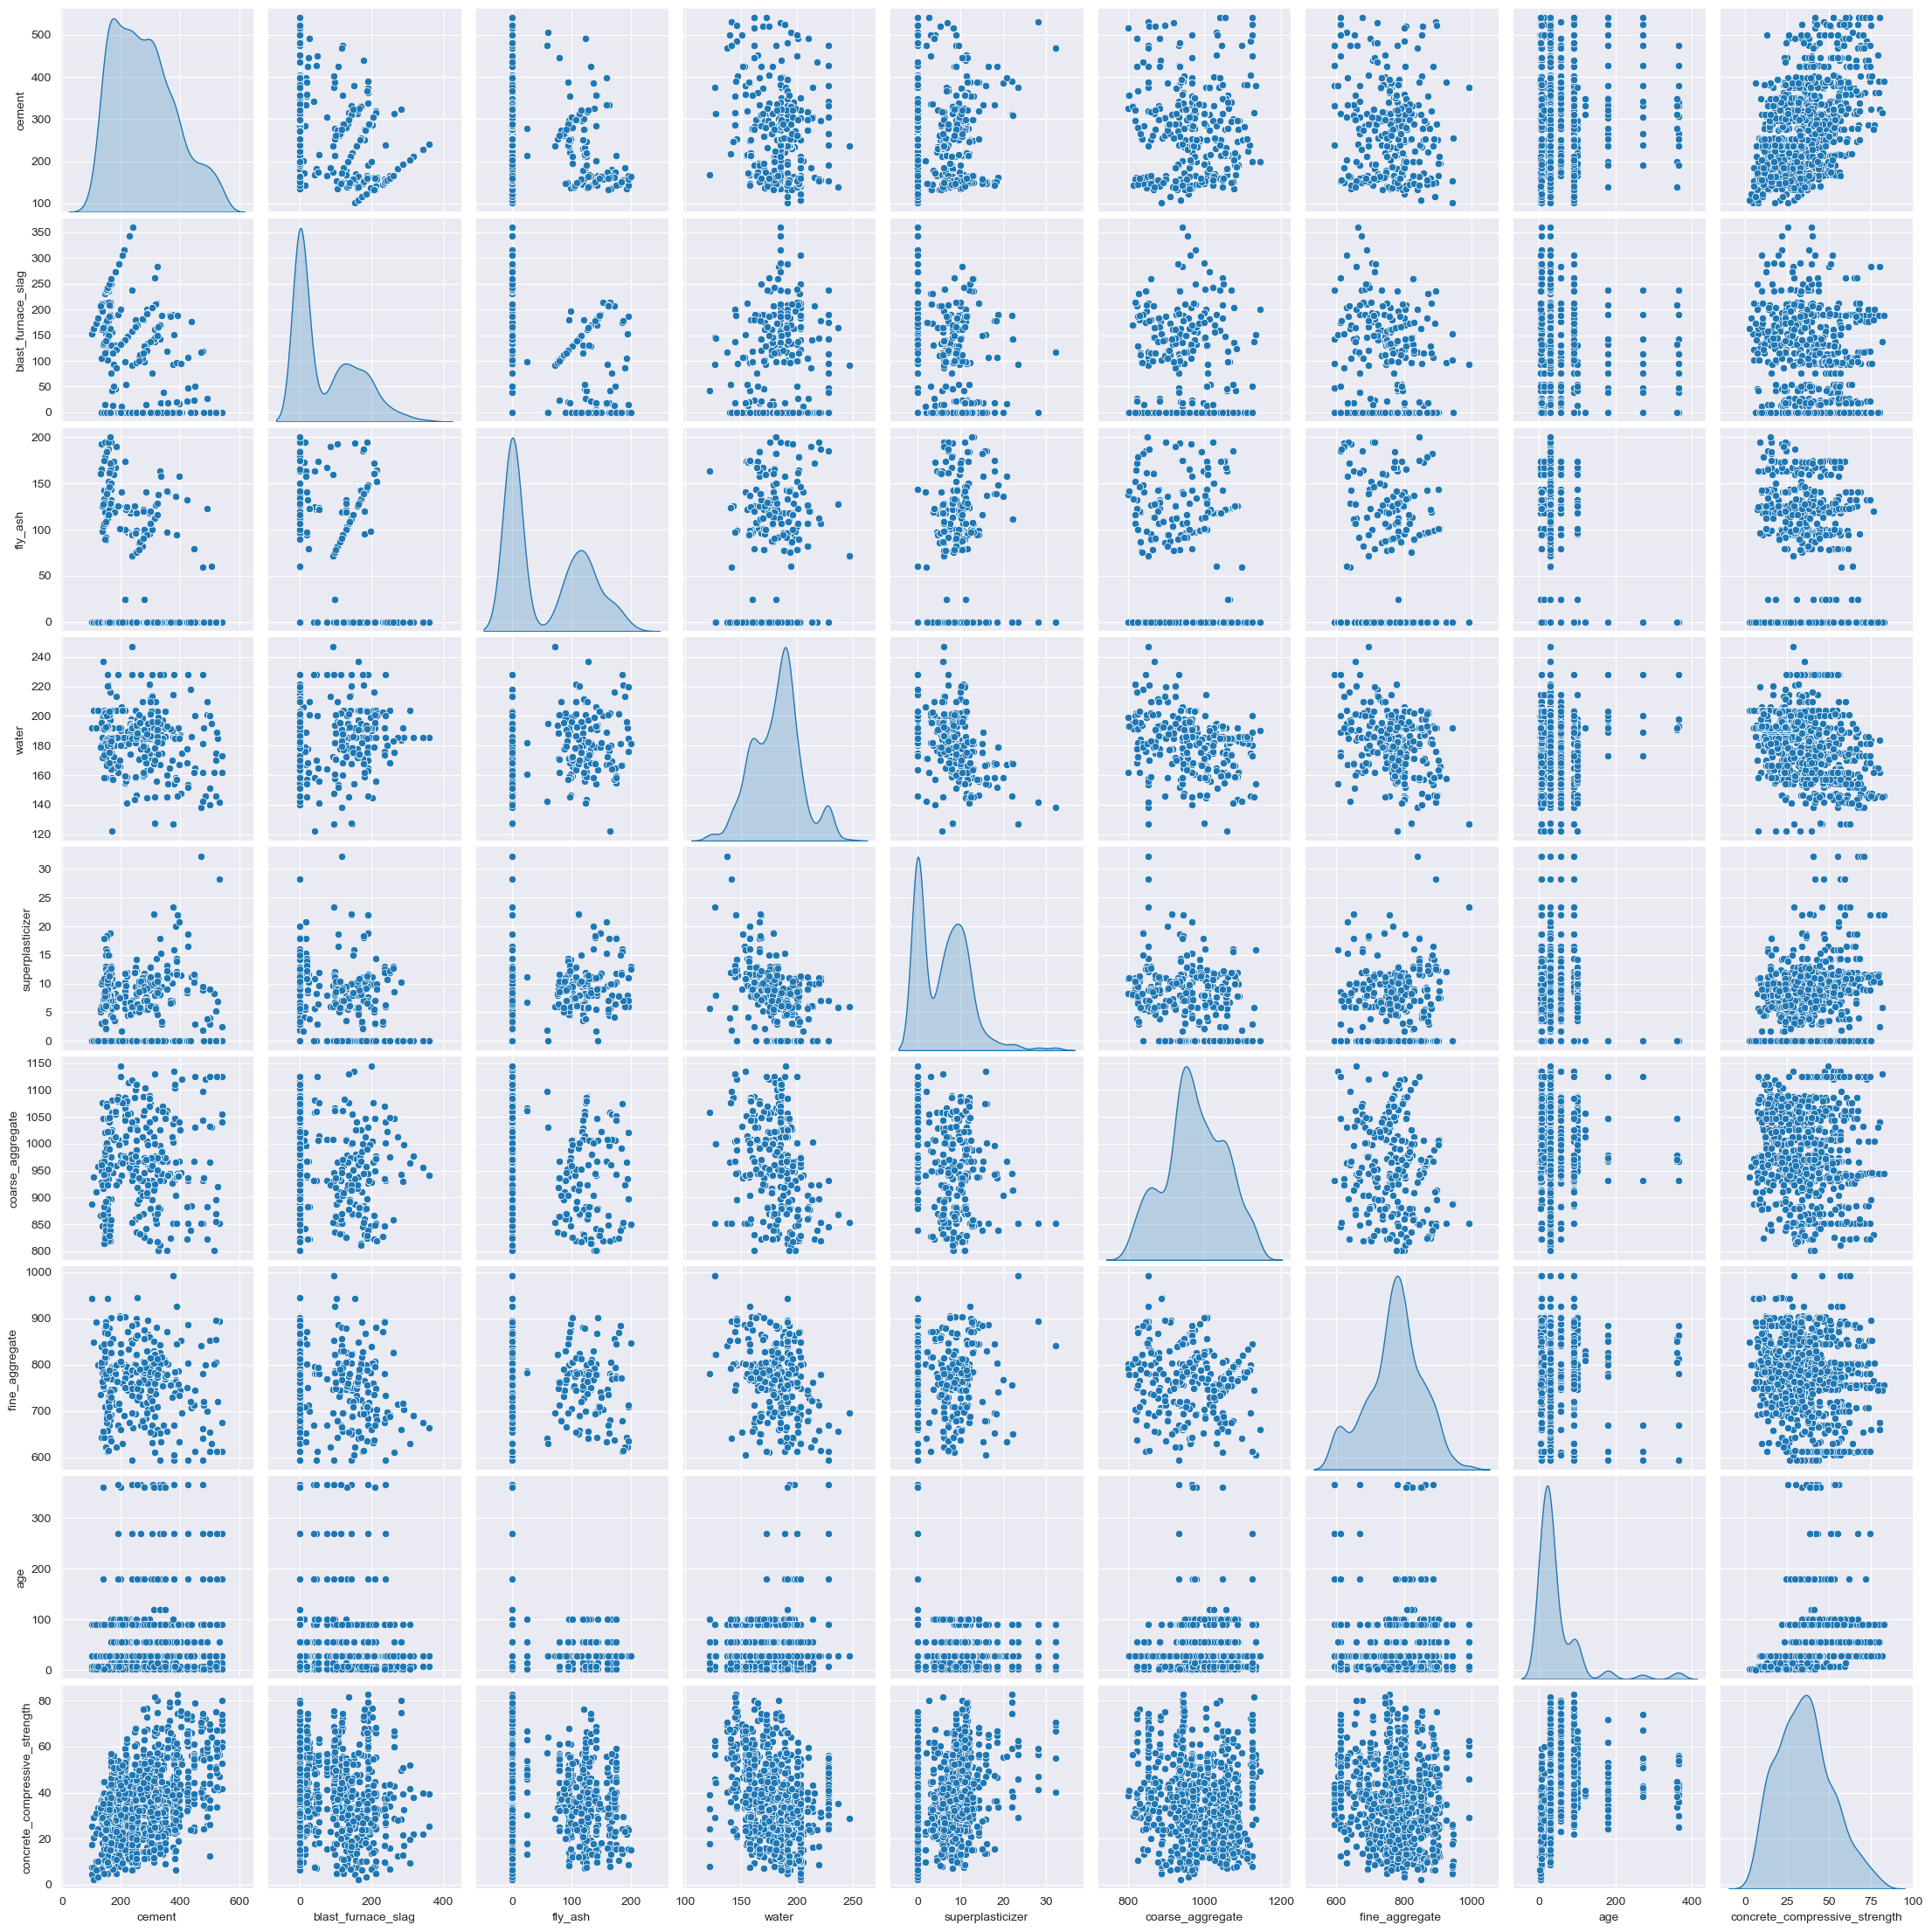

In [13]:
sns.pairplot(df, diag_kind='kde')

# Data splitting

In [14]:
X = df.drop(['concrete_compressive_strength'], axis = 1)
Y = df['concrete_compressive_strength']

In [15]:
X_big, X_test, y_big, y_test = train_test_split(X,Y, test_size = 0.2, random_state = 42,shuffle = True)
X_train, X_val, y_train, y_val = train_test_split(X_big,y_big, test_size = 0.3, random_state = 42,shuffle = True)

In [16]:
print(X_train.shape)
print(X_val.shape)
print(X_test.shape)

(562, 8)
(242, 8)
(201, 8)


# Model Evaluation criterion

* MAE, MSE, R-square, and Adjusted R-square

In [17]:
def adj_r2_score(predictors, targets, predictions):
    r2 = r2_score(targets, predictions)
    n = predictors.shape[0]
    k = predictors.shape[1]
    return 1 - ((1 - r2) * (n - 1) / (n - k - 1))

In [18]:
def model_performance_regression(predictors,target,pred):
    r2 = r2_score(target, pred)  # to compute R-squared
    adjr2 = adj_r2_score(predictors, target, pred)  # to compute adjusted R-squared
    rmse = np.sqrt(mean_squared_error(target, pred))  # to compute RMSE
    mae = mean_absolute_error(target, pred)  # to compute MAE

    df_perf = pd.DataFrame(
        {
            "RMSE": rmse,
            "MAE": mae,
            "R-squared": r2,
            "Adj. R-squared": adjr2,
        },
        index=[0],
    )

    return df_perf

In [19]:
models = []  # Empty list to store all the models

# Appending models into the list
models.append(("Bagging", BaggingRegressor(random_state=42)))
models.append(("Random forest", RandomForestRegressor(random_state=42)))
models.append(("AdaBoost", AdaBoostRegressor(random_state=42)))
models.append(("Gradient_Boost", GradientBoostingRegressor(random_state=42)))
models.append(("XGBoost", XGBRegressor(random_state=42)))

In [20]:
print("\n" "Training Performance:" "\n")
for name, model in models:
    model.fit(X_train, y_train)  # Convert y_train to a 1-dimensional array
    scores = mean_squared_error(y_train.values.ravel(), model.predict(X_train))
    print("{}: {}".format(name, scores))

print("\n" "Validation Performance:" "\n")

for name, model in models:
    model.fit(X_train, y_train)  # Convert y_train to a 1-dimensional array
    scores_val = mean_squared_error(y_val, model.predict(X_val))
    print("{}: {}".format(name, scores_val))


Training Performance:

Bagging: 7.969101909383156
Random forest: 5.383568688012843
AdaBoost: 46.15427937728386
Gradient_Boost: 12.177299133961672
XGBoost: 1.3562413901722632

Validation Performance:
Bagging: 32.78673976434344
Random forest: 28.65382726601321
AdaBoost: 61.26703171981197
Gradient_Boost: 28.348982139252264
XGBoost: 25.649714748585126


# Hyperparameter tuning

## Bagging

In [21]:
%%time

Bagging_model = BaggingRegressor(random_state=42)

param_grid = {
    'n_estimators': [10, 50, 100],  # Number of base estimators (decision trees)
    'max_samples': [0.5, 0.8, 1.0],  # Proportion of samples to draw from the training set for each base estimator
    'max_features': [0.5, 0.8, 1.0],  # Proportion of features to consider for each base estimator
    'bootstrap': [True, False],  # Whether to sample with replacement (True) or without replacement (False)
    'random_state': [42]  # Random seed for reproducibility
}

scorer = metrics.make_scorer(mean_squared_error)

randomized_cv = RandomizedSearchCV(estimator=Bagging_model, param_distributions=param_grid, n_iter=10, n_jobs = -1, scoring=scorer, cv=5, random_state=42)

randomized_cv.fit(X_train, y_train)

print("Best parameters are {} with CV score={}:" .format(randomized_cv.best_params_,randomized_cv.best_score_))

Best parameters are {'random_state': 42, 'n_estimators': 100, 'max_samples': 0.8, 'max_features': 0.5, 'bootstrap': True} with CV score=83.04016286076819:
CPU times: total: 1.41 s
Wall time: 4.67 s


In [22]:
Tuned_Bagging = randomized_cv.best_estimator_
Tuned_Bagging = Tuned_Bagging.fit(X_train, y_train)
Tuned_Bagging_result = Tuned_Bagging.predict(X_val)
tuned_bagging_train = model_performance_regression(X_val, y_val, Tuned_Bagging_result)
tuned_bagging_train

,RMSE,MAE,R-squared,Adj. R-squared
0,8.542,6.604,0.707,0.697


## Random Forest

In [25]:
%%time

Random_Forest = RandomForestRegressor(random_state=42)

param_grid = {
    'n_estimators': [100, 200, 300, 500],  # Number of decision trees in the random forest
    'max_depth': [None, 5, 10],  # Maximum depth of the decision trees
    'min_samples_split': [2, 5, 10],  # Minimum number of samples required to split an internal node
    'min_samples_leaf': np.arange(1, 4),  # Minimum number of samples required to be at a leaf node
    'max_features': [None, 'sqrt', 'log2'],  # Number of features to consider at each split
    'bootstrap': [True, False],  # Whether to sample with replacement (True) or without replacement (False)
    'random_state': [42]  # Random seed for reproducibility
}

scorer = metrics.make_scorer(mean_squared_error)

randomized_cv = RandomizedSearchCV(estimator=Random_Forest, param_distributions=param_grid, n_iter=10, n_jobs = -1, scoring=scorer, cv=5, random_state=42)

randomized_cv.fit(X_train, y_train)

print("Best parameters are {} with CV score={}:" .format(randomized_cv.best_params_,randomized_cv.best_score_))


Best parameters are {'random_state': 42, 'n_estimators': 100, 'min_samples_split': 5, 'min_samples_leaf': 2, 'max_features': None, 'max_depth': 5, 'bootstrap': False} with CV score=81.0646692053272:
CPU times: total: 250 ms
Wall time: 4.57 s


In [26]:
Tuned_forest = randomized_cv.best_estimator_
Tuned_forest = Tuned_forest.fit(X_train, y_train)
Tuned_forest_result = Tuned_forest.predict(X_val)
tuned_forest_train = model_performance_regression(X_val, y_val, Tuned_forest_result)
tuned_forest_train

,RMSE,MAE,R-squared,Adj. R-squared
0,8.143,6.269,0.734,0.725


## AdaBoost

In [25]:
%%time 

Ada_boost = AdaBoostRegressor(random_state=42)

param_grid = {
    'n_estimators': [50, 100, 200],  # Number of base estimators
    'learning_rate': [1, 1.5, 0.2, 0.1, 0.01, 0.001],  # Learning rate shrinks the contribution of each base estimator
    'loss': ['linear', 'square', 'exponential'],  # Loss function to use when updating the weights after each boosting iteration
    'random_state': [42]  # Random seed for reproducibility
}

scorer = metrics.make_scorer(mean_squared_error)

randomized_cv = RandomizedSearchCV(estimator=Ada_boost, param_distributions=param_grid, n_iter=10, n_jobs = -1, scoring=scorer, cv=5, random_state=42)

randomized_cv.fit(X_train, y_train)

print("Best parameters are {} with CV score={}:" .format(randomized_cv.best_params_,randomized_cv.best_score_))

Best parameters are {'random_state': 42, 'n_estimators': 50, 'loss': 'square', 'learning_rate': 0.001} with CV score=90.3966089651789:
CPU times: total: 31.2 ms
Wall time: 1.75 s


In [26]:
Tuned_Ada = randomized_cv.best_estimator_
Tuned_Ada = Tuned_Ada.fit(X_train, y_train)
Tuned_Ada_result = Tuned_Ada.predict(X_val)
tuned_Ada_train = model_performance_regression(X_val, y_val, Tuned_Ada_result)
tuned_Ada_train

,RMSE,MAE,R-squared,Adj. R-squared
0,8.956,7.242,0.678,0.667


## Gradient Boosting 

In [27]:
%%time 

GradientBoost = GradientBoostingRegressor(random_state=42)

param_grid = {
    'n_estimators': [50, 100, 200],  # Number of boosting stages
    'learning_rate': [1, 1.2, 0.1, 0.01, 0.001],  # Learning rate shrinks the contribution of each tree
    'max_depth': [3, 5, 7],  # Maximum depth of the individual regression estimators
    'min_samples_split': [2, 5, 10],  # Minimum number of samples required to split an internal node
    'min_samples_leaf': [1, 2, 4],  # Minimum number of samples required to be at a leaf node
    'max_features': [None, 'sqrt', 'log2', 'sqrt'],  # Number of features to consider at each split
    'loss': ['absolute_error', 'squared_error', 'quantile', 'huber'],  # Loss function to optimize
    'random_state': [42]  # Random seed for reproducibility
}

scorer = metrics.make_scorer(mean_squared_error)

randomized_cv = RandomizedSearchCV(estimator=GradientBoost, param_distributions=param_grid, n_iter=10, n_jobs = -1, scoring=scorer, cv=5, random_state=42)

randomized_cv.fit(X_train, y_train)

print("Best parameters are {} with CV score={}:" .format(randomized_cv.best_params_,randomized_cv.best_score_))

Best parameters are {'random_state': 42, 'n_estimators': 50, 'min_samples_split': 10, 'min_samples_leaf': 2, 'max_features': 'sqrt', 'max_depth': 3, 'loss': 'absolute_error', 'learning_rate': 0.001} with CV score=250.55651006243164:
CPU times: total: 62.5 ms
Wall time: 2.36 s


In [28]:
Tuned_Gradient = randomized_cv.best_estimator_
Tuned_Gradient = Tuned_Gradient.fit(X_train, y_train)
Tuned_Gra_result = Tuned_Gradient.predict(X_val)
tuned_Gra_train = model_performance_regression(X_val, y_val, Tuned_Gra_result)
tuned_Gra_train

,RMSE,MAE,R-squared,Adj. R-squared
0,15.723,12.785,0.008,-0.026


## XG Boost

In [29]:
%%time

XG_boost = XGBRegressor(random_state = 42)

param_grid = {
    'n_estimators': [50, 100, 200, 500, 750],  # Number of boosting stages
    'learning_rate': [1, 0.2, 0.1, 0.01, 0.001],  # Learning rate shrinks the contribution of each tree
    'max_depth': [3, 5, 7],  # Maximum depth of a tree
    'subsample': [0.8, 0.9, 1.0],  # Subsample ratio of the training instances
    'colsample_bytree': [0.8, 0.9, 1.0],  # Subsample ratio of columns when constructing each tree
    'gamma': [0, 0.1, 0.2],  # Minimum loss reduction required to make a further partition on a leaf node
    'reg_alpha': [0, 0.1, 0.2, 0.5],  # L1 regularization term on weights
    'reg_lambda': [0, 0.1, 0.2, 0.5],  # L2 regularization term on weights
    'random_state': [42]  # Random seed for reproducibility
}

scorer = metrics.make_scorer(mean_squared_error)

randomized_cv = RandomizedSearchCV(estimator=XG_boost, param_distributions=param_grid, n_iter=10, n_jobs = -1, scoring=scorer, cv=5, random_state=42)

randomized_cv.fit(X_train, y_train)

print("Best parameters are {} with CV score={}:" .format(randomized_cv.best_params_,randomized_cv.best_score_))

Best parameters are {'subsample': 0.9, 'reg_lambda': 0, 'reg_alpha': 0.2, 'random_state': 42, 'n_estimators': 50, 'max_depth': 7, 'learning_rate': 0.01, 'gamma': 0.1, 'colsample_bytree': 0.8} with CV score=602.0312892982281:
CPU times: total: 1.06 s
Wall time: 1.56 s


In [30]:
Tuned_XG = randomized_cv.best_estimator_
Tuned_XG = Tuned_XG.fit(X_train, y_train)
Tuned_XG_result = Tuned_XG.predict(X_val)
tuned_XG_train = model_performance_regression(X_val, y_val, Tuned_XG_result)
tuned_XG_train

,RMSE,MAE,R-squared,Adj. R-squared
0,22.661,19.627,-1.061,-1.132


# Summary

In [31]:
models_train_comp_df = pd.concat(
    [
        tuned_Ada_train.T,
        tuned_forest_train.T,
        tuned_bagging_train.T,
        tuned_Gra_train.T,
        tuned_XG_train.T
    ],
    axis=1,
)

models_train_comp_df.columns = [
    'Tuned_ada',
    'Tuned_forest',
    'Tuned_bagging',
    'Tuned_gradient',
    'Tuned_XG'
]

print("Training performance comparison:")
models_train_comp_df

Training performance comparison:


,Tuned_ada,Tuned_forest,Tuned_bagging,Tuned_gradient,Tuned_XG
RMSE,8.956,8.143,8.542,15.723,22.661
MAE,7.242,6.269,6.604,12.785,19.627
R-squared,0.678,0.734,0.707,0.008,-1.061
Adj. R-squared,0.667,0.725,0.697,-0.026,-1.132


# Model selection for the test set

In [32]:
test = Tuned_forest.predict(X_test)
Model_test = model_performance_regression(X_test, y_test, test)
Model_test

,RMSE,MAE,R-squared,Adj. R-squared
0,8.491,6.437,0.758,0.748


# SHAP

Exact explainer: 1006it [01:03, 13.79it/s]                          


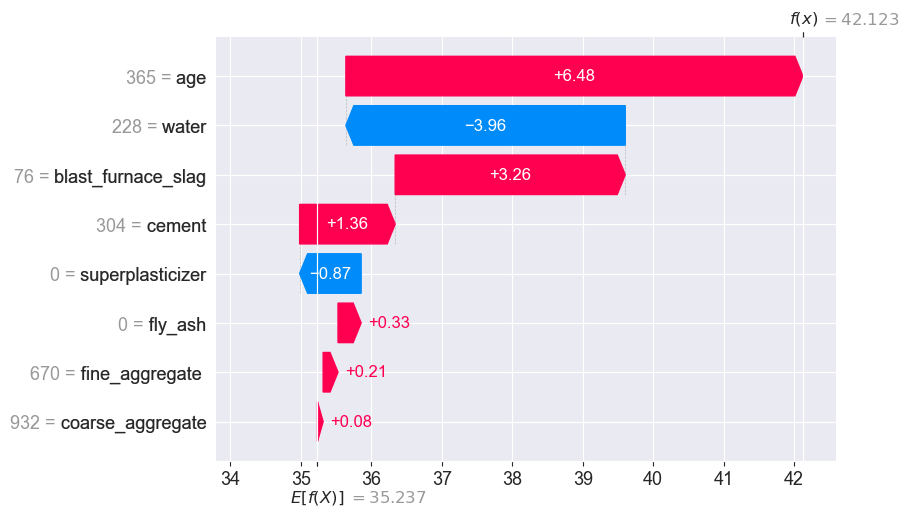

In [33]:
explainer = shap.Explainer(Tuned_forest.predict, X)
shap_values = explainer(X)
sample_ind = 30
shap.plots.waterfall(shap_values[sample_ind])

No data for colormapping provided via 'c'. Parameters 'vmin', 'vmax' will be ignored


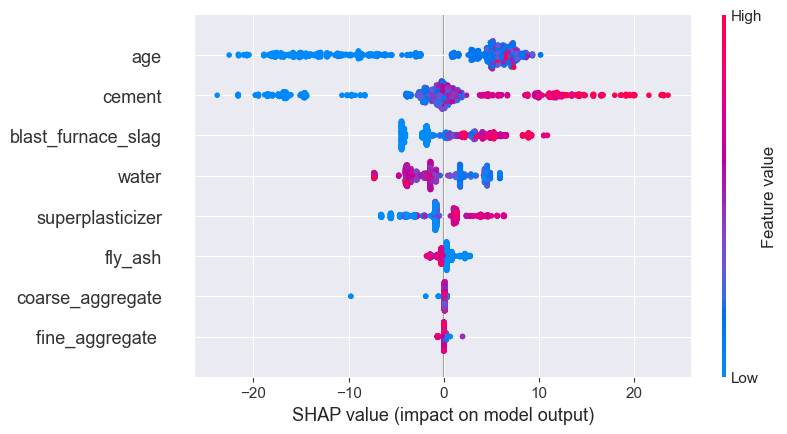

In [34]:
shap.plots.beeswarm(shap_values)

In [35]:
df.iloc[30]

cement                          304.000
blast_furnace_slag               76.000
fly_ash                           0.000
water                           228.000
superplasticizer                  0.000
coarse_aggregate                932.000
fine_aggregate                  670.000
age                             365.000
concrete_compressive_strength    55.260
Name: 30, dtype: float64

In [36]:
y_pred = Tuned_forest.predict(X)
df_predictions = pd.DataFrame({'True Values': Y, 'Predicted Values': y_pred})

In [37]:
df_predictions

,True Values,Predicted Values
0,79.990,65.373
1,61.890,65.373
2,40.270,42.123
3,41.050,42.123
4,44.300,42.123
...,...,...
1025,44.280,42.123
1026,31.180,31.164
1027,23.700,27.650
1028,32.770,32.873


In [38]:
df_predictions['Difference'] = df_predictions['True Values'] - df_predictions['Predicted Values']
df_predictions

,True Values,Predicted Values,Difference
0,79.990,65.373,14.617
1,61.890,65.373,-3.483
2,40.270,42.123,-1.853
3,41.050,42.123,-1.073
4,44.300,42.123,2.177
...,...,...,...
1025,44.280,42.123,2.157
1026,31.180,31.164,0.016
1027,23.700,27.650,-3.950
1028,32.770,32.873,-0.103


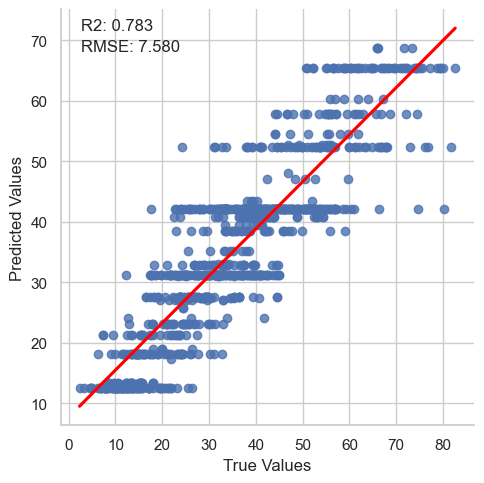

In [39]:
r2 = r2_score(df_predictions['True Values'], df_predictions['Predicted Values'])
rmse = mean_squared_error(df_predictions['True Values'], df_predictions['Predicted Values'], squared=False)

# Create the lmplot
sns.set(style="whitegrid")
lm_plot = sns.lmplot(data=df_predictions, x='True Values', y='Predicted Values', ci=True, line_kws={'color': 'red'})

# Annotate the plot with R2 and RMSE
plt.text(0.05, 0.95, f'R2: {r2:.3f}', transform=plt.gca().transAxes)
plt.text(0.05, 0.9, f'RMSE: {rmse:.3f}', transform=plt.gca().transAxes)

# Display the plot
plt.show()

# Best model with provided data (for compressive strength)

In [40]:
All = pd.ExcelFile('allData.xls')
data = pd.read_excel(All, 'Data')
data

,Number,Data source,Selected,Mix number in literature,ASTM type 1 ordinary Portland Cement content (kg/m^3),CEM I 42.5N ordinary Portland Cement content (kg/m^3),CEM I 52.5N ordinary Portland Cement content (kg/m^3),Class C Fly ash content (kg/m^3),Class F Fly ash content (kg/m^3),Slag content (kg/m^3),...,Annual average temperature of exposed environment (Celsius degree),Annual wetting times/rainy days of exposed environment (d),Annual average precipitation of exposed environment (mm),Slump (mm),Average 28-day compressive strength (Mpa),Average 28-day split strength (Mpa),Chloride diffusion coefficient (10-12 m2/s),Average carbonation coefficient (mm/year^0.5),Specimen size,Note
0,NaN,2. Yunusa 2014,NaN,PC-40,0.000,0.000,450.000,0.000,0.000,0.000,...,24.300,0.000,0.000,30.000,75.930,NaN,NaN,3.139,NaN,No significant effect of initial water curing ...
1,NaN,2. Yunusa 2014,NaN,PC-50,0.000,0.000,400.000,0.000,0.000,0.000,...,24.300,0.000,0.000,60.000,64.500,NaN,NaN,4.022,NaN,NaN
2,NaN,2. Yunusa 2014,NaN,PC-60,0.000,0.000,350.000,0.000,0.000,0.000,...,24.300,0.000,0.000,100.000,49.230,NaN,NaN,6.670,NaN,NaN
3,NaN,2. Yunusa 2014,NaN,PC-75,0.000,0.000,300.000,0.000,0.000,0.000,...,24.300,0.000,0.000,140.000,36.000,NaN,NaN,7.945,NaN,NaN
4,NaN,2. Yunusa 2014,NaN,FA-40,0.000,0.000,315.000,0.000,135.000,0.000,...,24.300,0.000,0.000,40.000,62.800,NaN,NaN,6.052,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1983,NaN,"J48. Farahani, 2015",NaN,W3-4,350.000,0.000,0.000,0.000,0.000,0.000,...,NaN,NaN,NaN,NaN,NaN,NaN,1.550,NaN,150*150*150,NaN
1984,NaN,"J48. Farahani, 2015",NaN,W4-1,380.000,0.000,0.000,0.000,0.000,0.000,...,NaN,NaN,NaN,NaN,NaN,NaN,3.375,NaN,150*150*150,NaN
1985,NaN,"J48. Farahani, 2015",NaN,W4-2,370.000,0.000,0.000,0.000,0.000,0.000,...,NaN,NaN,NaN,NaN,NaN,NaN,1.000,NaN,150*150*150,NaN
1986,NaN,"J48. Farahani, 2015",NaN,W4-3,360.000,0.000,0.000,0.000,0.000,0.000,...,NaN,NaN,NaN,NaN,NaN,NaN,0.500,NaN,150*150*150,NaN


In [41]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1988 entries, 0 to 1987
Data columns (total 34 columns):
 #   Column                                                              Non-Null Count  Dtype  
---  ------                                                              --------------  -----  
 0   Number                                                              0 non-null      float64
 1   Data source                                                         1988 non-null   object 
 2   Selected                                                            194 non-null    object 
 3   Mix number in literature                                            1988 non-null   object 
 4   ASTM type 1 ordinary Portland Cement content (kg/m^3)               1988 non-null   float64
 5   CEM I 42.5N ordinary Portland Cement content (kg/m^3)               1988 non-null   float64
 6   CEM I 52.5N ordinary Portland Cement content (kg/m^3)               1988 non-null   float64
 7   Class C Fly ash

In [42]:
data['Maximum coarse aggregate size (mm)'].value_counts()

20.000    958
16.000    330
19.000    241
10.000    182
25.000    125
12.500     67
12.000     37
13.000     18
30.000     10
14.000      8
9.500       8
15.000      4
Name: Maximum coarse aggregate size (mm), dtype: int64

# EDA

In [43]:
df1 = data.copy()
df1 = df1.drop(['Number', 'Data source', 'Selected', 'Mix number in literature', 'Location', 'Note'], axis=1)
df1

,ASTM type 1 ordinary Portland Cement content (kg/m^3),CEM I 42.5N ordinary Portland Cement content (kg/m^3),CEM I 52.5N ordinary Portland Cement content (kg/m^3),Class C Fly ash content (kg/m^3),Class F Fly ash content (kg/m^3),Slag content (kg/m^3),Silica fume content (kg/m^3),Water content (kg/m^3),Superplasticizer content (kg/m^3),Maximum coarse aggregate size (mm),...,Annual average humidity of exposed environment (%),Annual average temperature of exposed environment (Celsius degree),Annual wetting times/rainy days of exposed environment (d),Annual average precipitation of exposed environment (mm),Slump (mm),Average 28-day compressive strength (Mpa),Average 28-day split strength (Mpa),Chloride diffusion coefficient (10-12 m2/s),Average carbonation coefficient (mm/year^0.5),Specimen size
0,0.000,0.000,450.000,0.000,0.000,0.000,0.000,180.000,4.000,20.000,...,33.700,24.300,0.000,0.000,30.000,75.930,NaN,NaN,3.139,NaN
1,0.000,0.000,400.000,0.000,0.000,0.000,0.000,200.000,3.250,20.000,...,33.700,24.300,0.000,0.000,60.000,64.500,NaN,NaN,4.022,NaN
2,0.000,0.000,350.000,0.000,0.000,0.000,0.000,210.000,0.000,20.000,...,33.700,24.300,0.000,0.000,100.000,49.230,NaN,NaN,6.670,NaN
3,0.000,0.000,300.000,0.000,0.000,0.000,0.000,225.000,0.000,20.000,...,33.700,24.300,0.000,0.000,140.000,36.000,NaN,NaN,7.945,NaN
4,0.000,0.000,315.000,0.000,135.000,0.000,0.000,180.000,1.750,20.000,...,33.700,24.300,0.000,0.000,40.000,62.800,NaN,NaN,6.052,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1983,350.000,0.000,0.000,0.000,0.000,0.000,50.000,180.000,2.000,20.000,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.550,NaN,150*150*150
1984,380.000,0.000,0.000,0.000,0.000,0.000,20.000,200.000,0.800,20.000,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3.375,NaN,150*150*150
1985,370.000,0.000,0.000,0.000,0.000,0.000,30.000,200.000,1.200,20.000,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.000,NaN,150*150*150
1986,360.000,0.000,0.000,0.000,0.000,0.000,40.000,200.000,1.800,20.000,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.500,NaN,150*150*150


In [44]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1988 entries, 0 to 1987
Data columns (total 28 columns):
 #   Column                                                              Non-Null Count  Dtype  
---  ------                                                              --------------  -----  
 0   ASTM type 1 ordinary Portland Cement content (kg/m^3)               1988 non-null   float64
 1   CEM I 42.5N ordinary Portland Cement content (kg/m^3)               1988 non-null   float64
 2   CEM I 52.5N ordinary Portland Cement content (kg/m^3)               1988 non-null   float64
 3   Class C Fly ash content (kg/m^3)                                    1988 non-null   float64
 4   Class F Fly ash content (kg/m^3)                                    1988 non-null   float64
 5   Slag content (kg/m^3)                                               1988 non-null   float64
 6   Silica fume content (kg/m^3)                                        1988 non-null   float64
 7   Water content (

In [45]:
df1.describe().T

,count,mean,std,min,25%,50%,75%,max
ASTM type 1 ordinary Portland Cement content (kg/m^3),1988.000,39.318,106.826,0.000,0.000,0.000,0.000,702.000
CEM I 42.5N ordinary Portland Cement content (kg/m^3),1988.000,95.567,146.591,0.000,0.000,0.000,210.000,547.000
CEM I 52.5N ordinary Portland Cement content (kg/m^3),1988.000,147.093,152.375,0.000,0.000,155.000,280.000,660.000
Class C Fly ash content (kg/m^3),1988.000,6.120,28.792,0.000,0.000,0.000,0.000,225.000
Class F Fly ash content (kg/m^3),1988.000,35.498,65.745,0.000,0.000,0.000,56.500,544.000
Slag content (kg/m^3),1988.000,34.630,73.838,0.000,0.000,0.000,0.000,440.000
Silica fume content (kg/m^3),1988.000,7.593,21.082,0.000,0.000,0.000,0.000,150.000
Water content (kg/m^3),1988.000,172.241,28.372,105.000,153.000,170.000,186.000,295.000
Superplasticizer content (kg/m^3),1988.000,2.336,4.726,0.000,0.000,0.000,2.703,35.100
Maximum coarse aggregate size (mm),1988.000,18.122,3.829,9.500,16.000,20.000,20.000,30.000


Ignoring `palette` because no `hue` variable has been assigned.
Ignoring `palette` because no `hue` variable has been assigned.
Ignoring `palette` because no `hue` variable has been assigned.
Ignoring `palette` because no `hue` variable has been assigned.
Ignoring `palette` because no `hue` variable has been assigned.
Ignoring `palette` because no `hue` variable has been assigned.
Ignoring `palette` because no `hue` variable has been assigned.
Ignoring `palette` because no `hue` variable has been assigned.
Ignoring `palette` because no `hue` variable has been assigned.
Ignoring `palette` because no `hue` variable has been assigned.
Ignoring `palette` because no `hue` variable has been assigned.
Ignoring `palette` because no `hue` variable has been assigned.
Ignoring `palette` because no `hue` variable has been assigned.
Ignoring `palette` because no `hue` variable has been assigned.
Ignoring `palette` because no `hue` variable has been assigned.
Ignoring `palette` because no `hue` vari

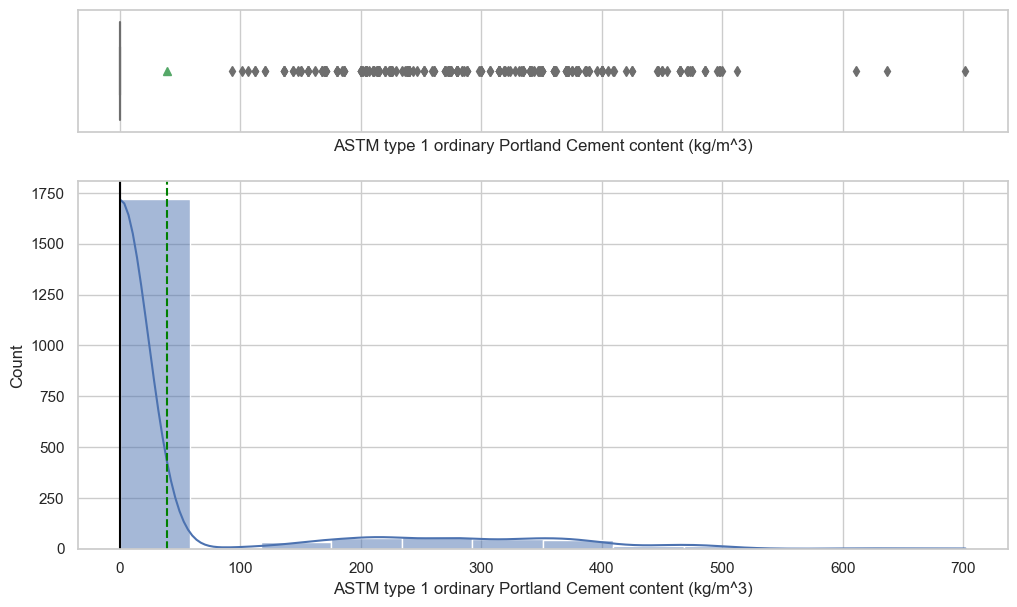

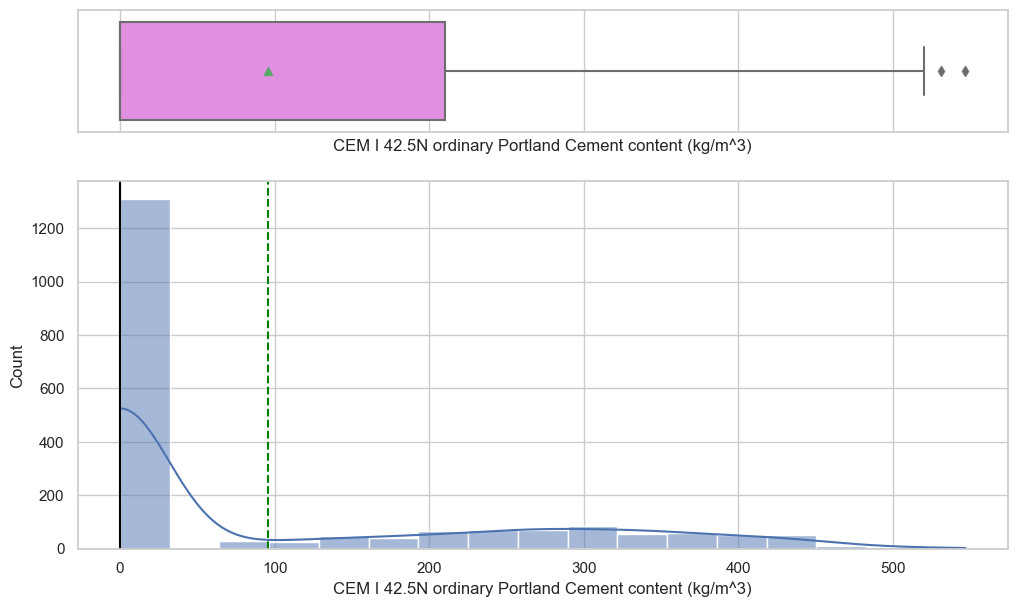

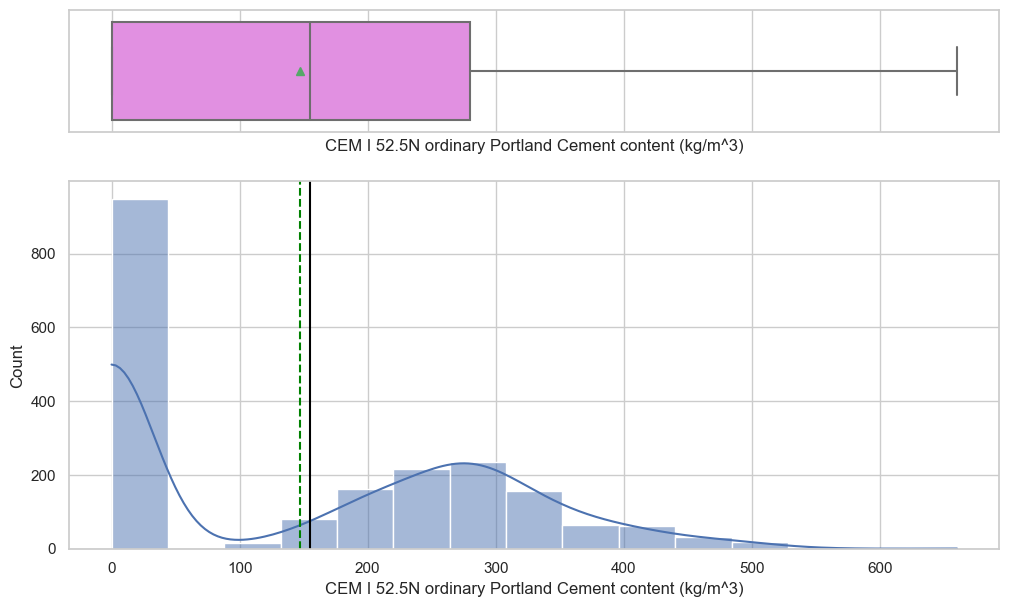

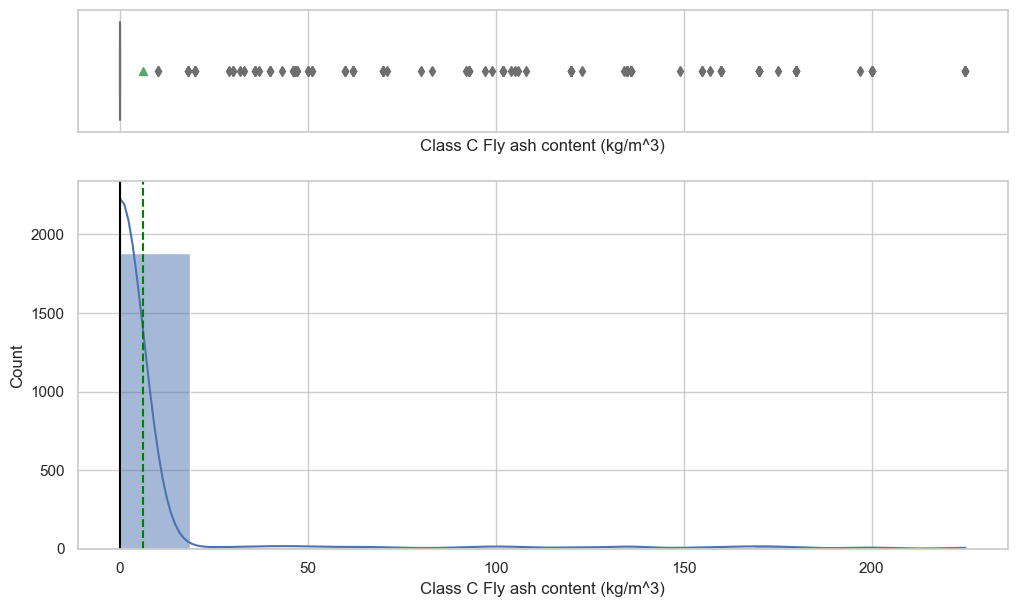

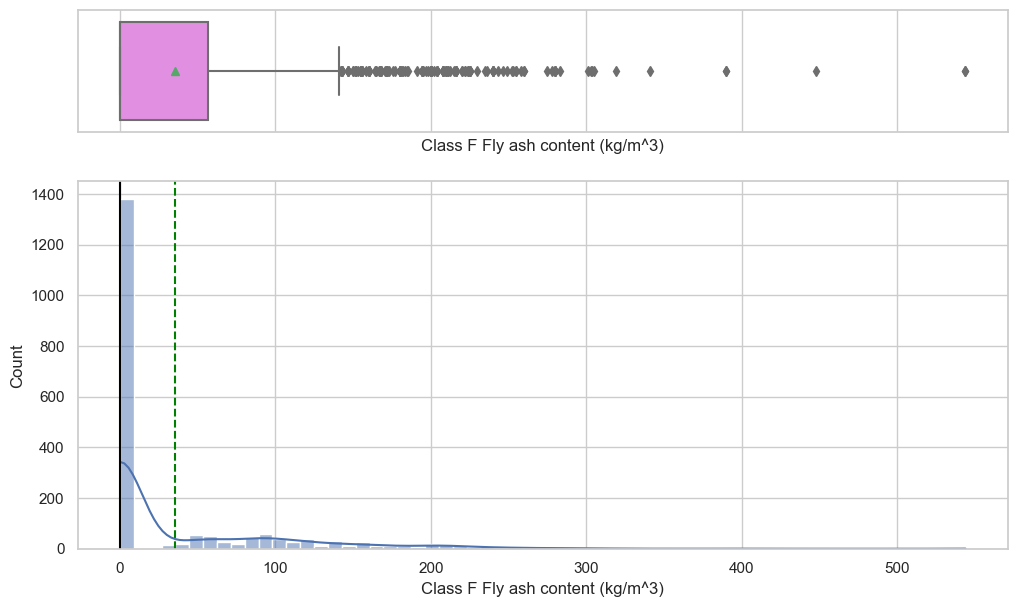

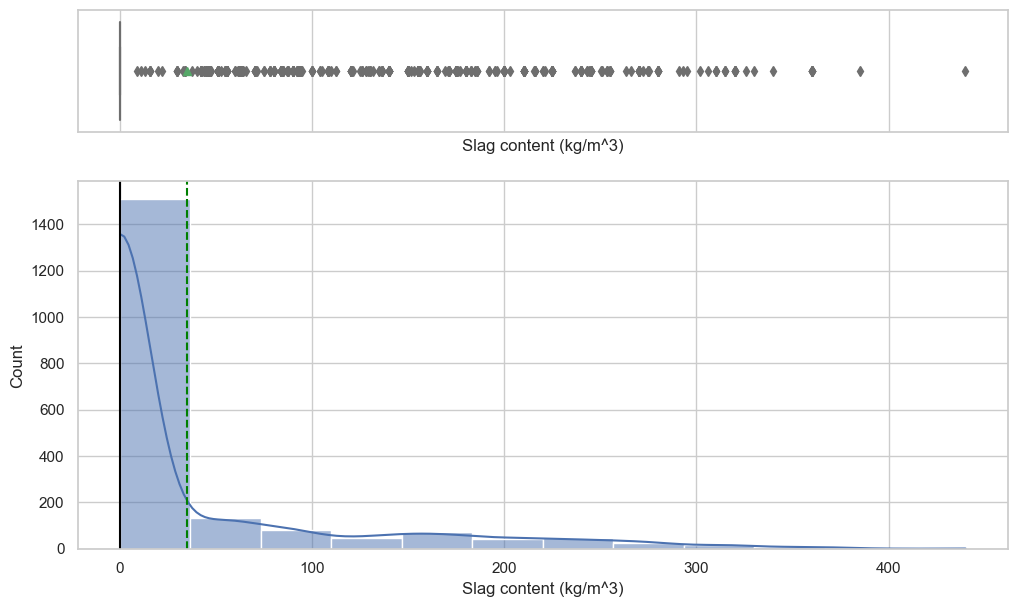

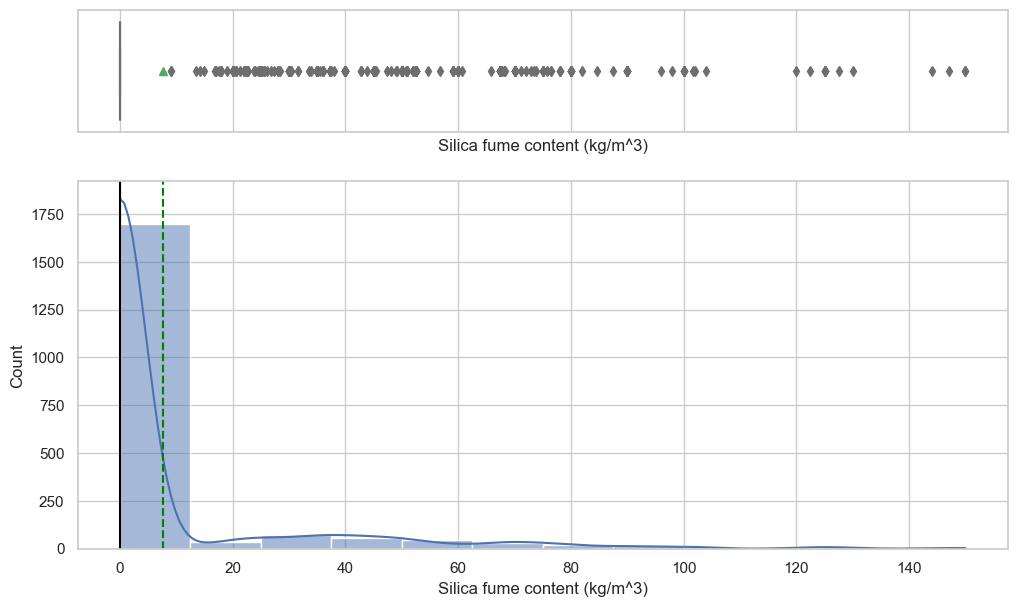

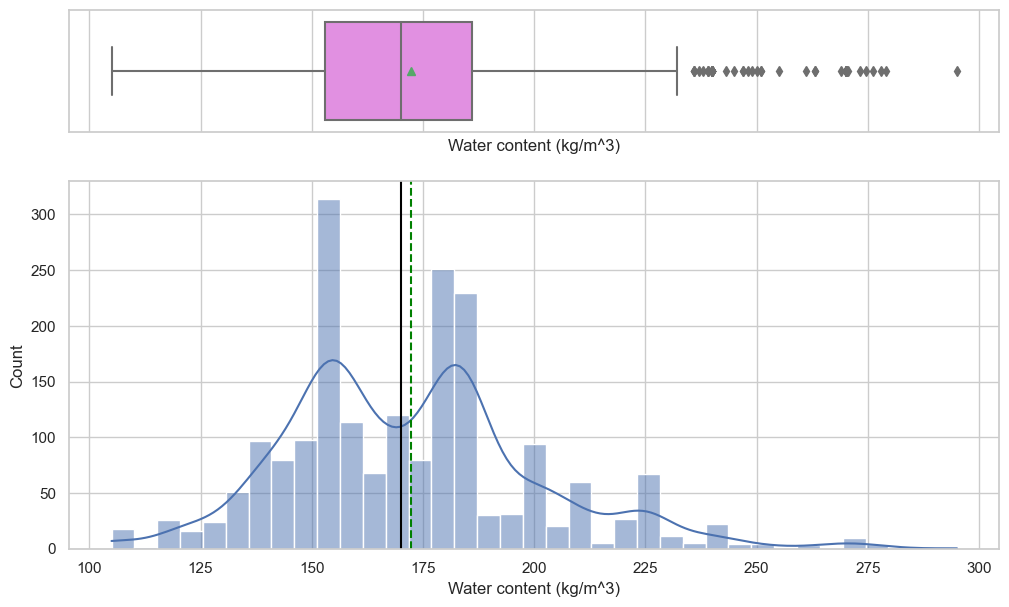

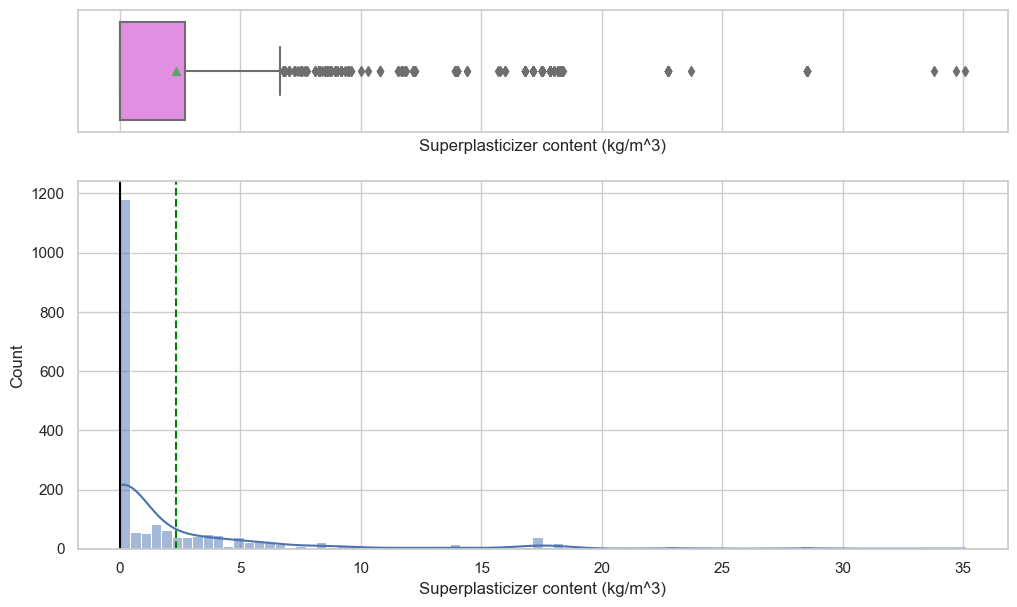

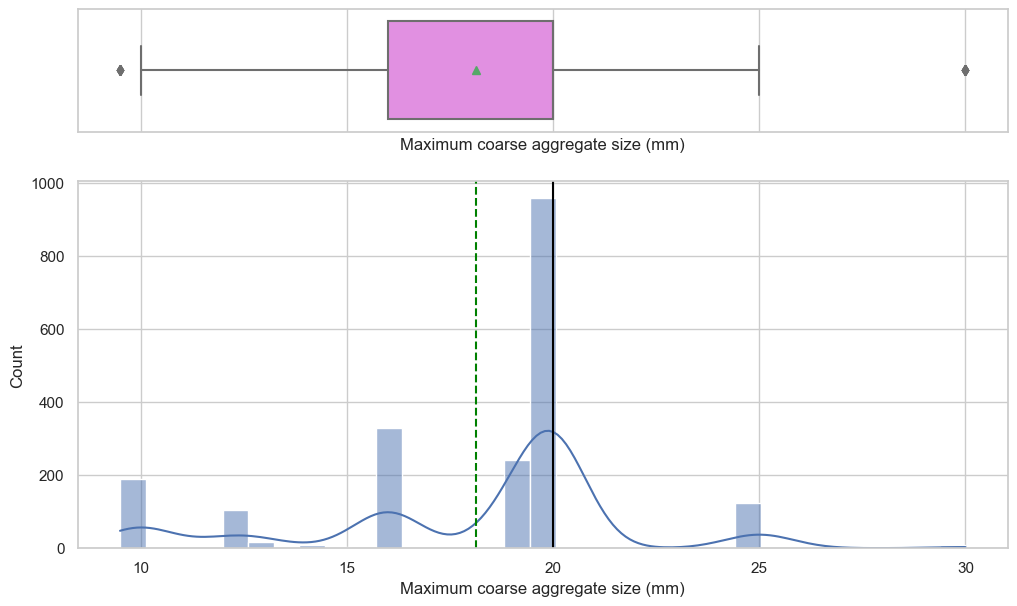

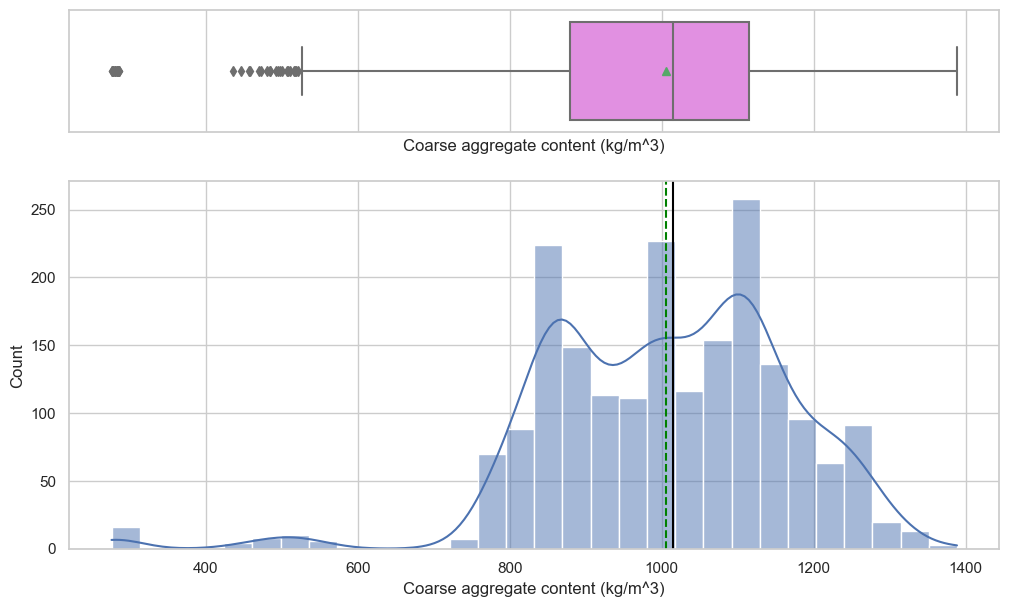

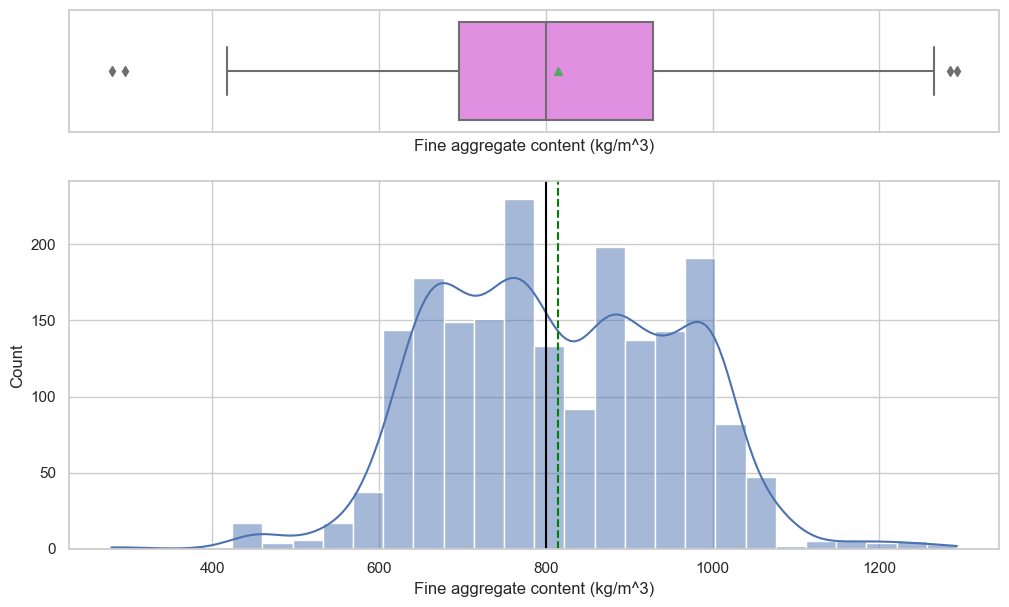

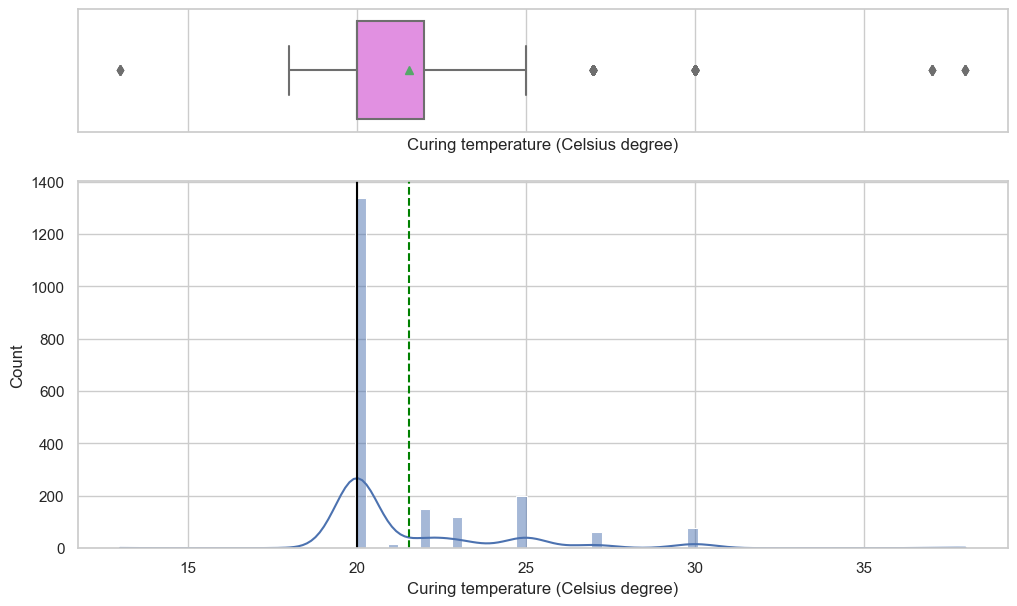

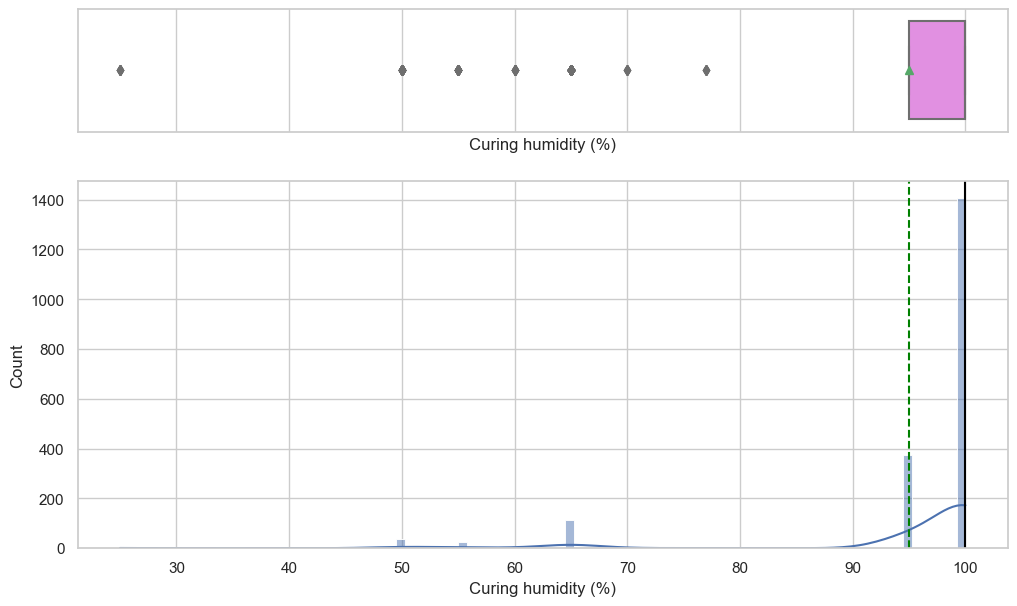

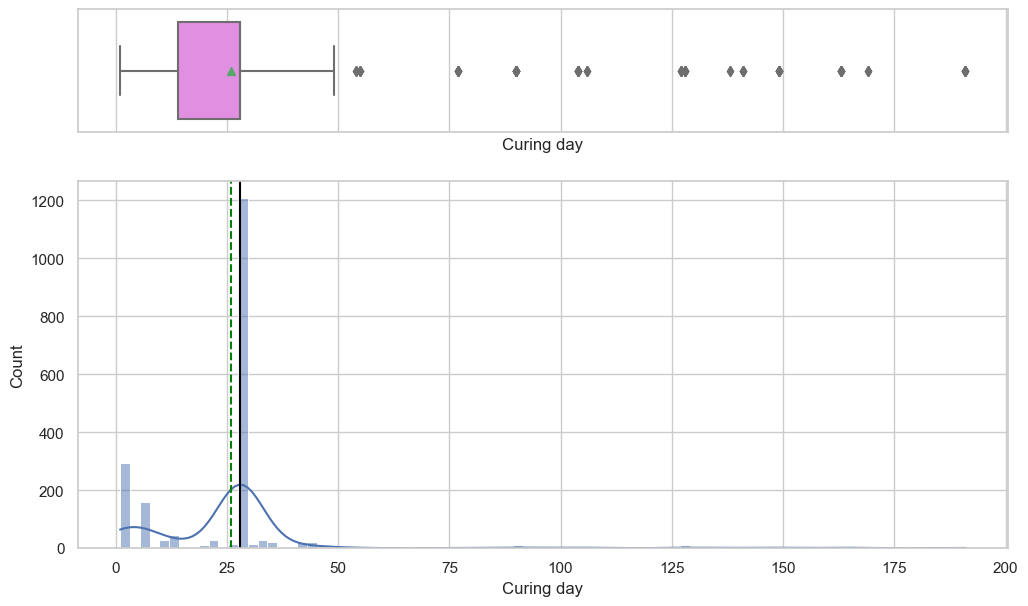

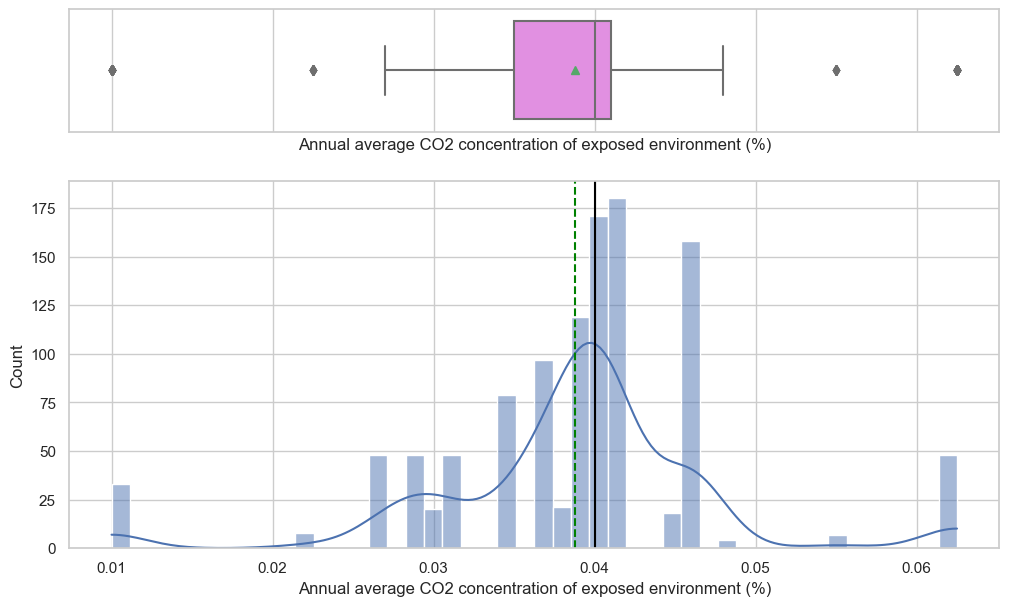

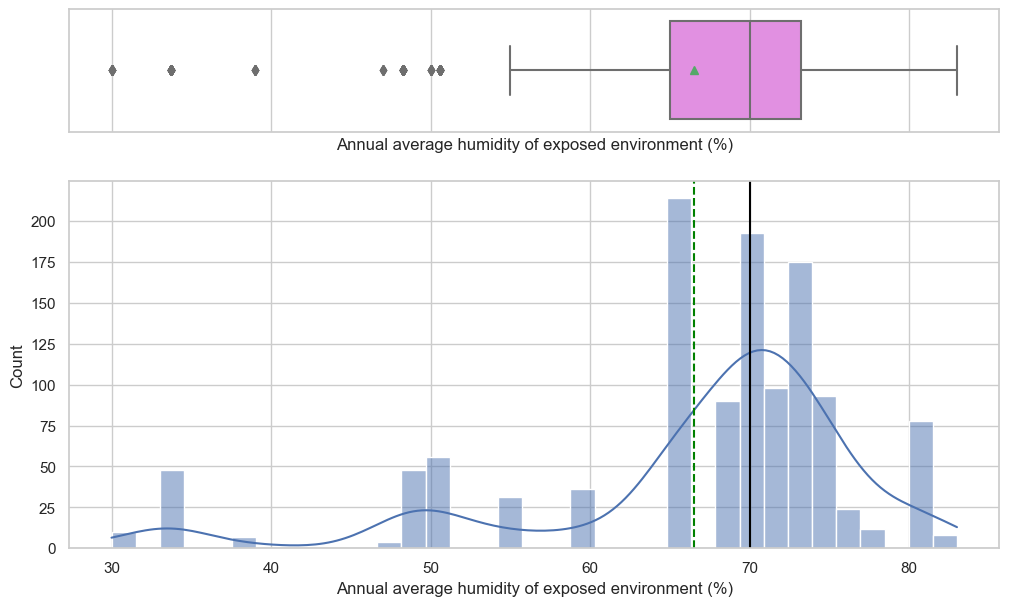

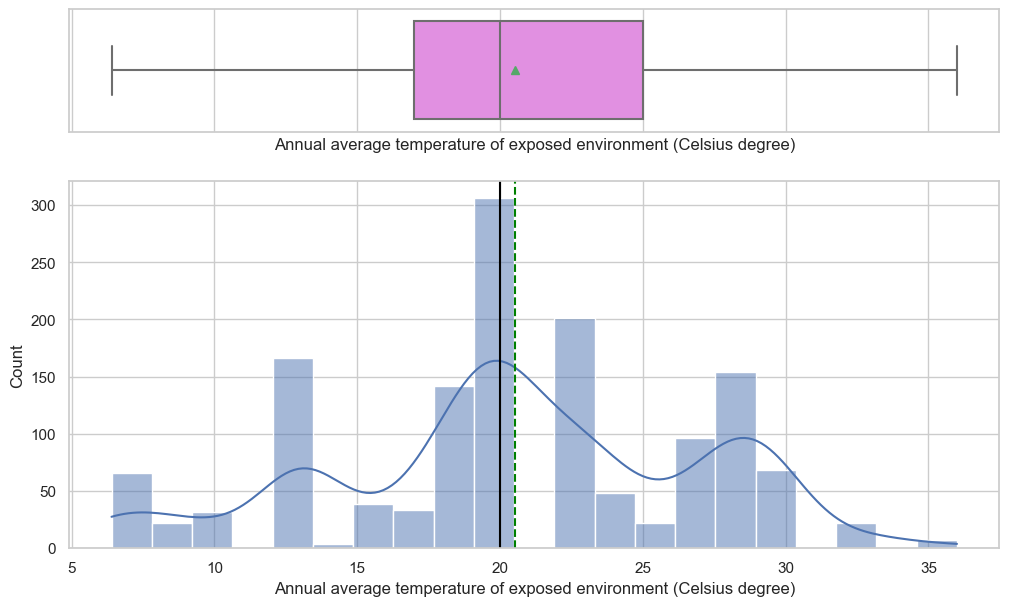

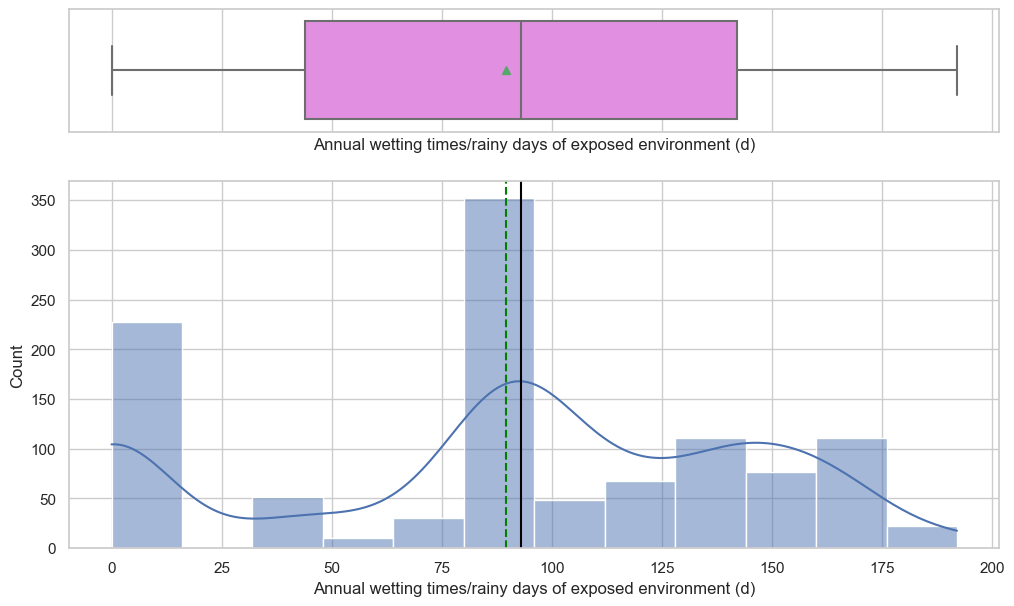

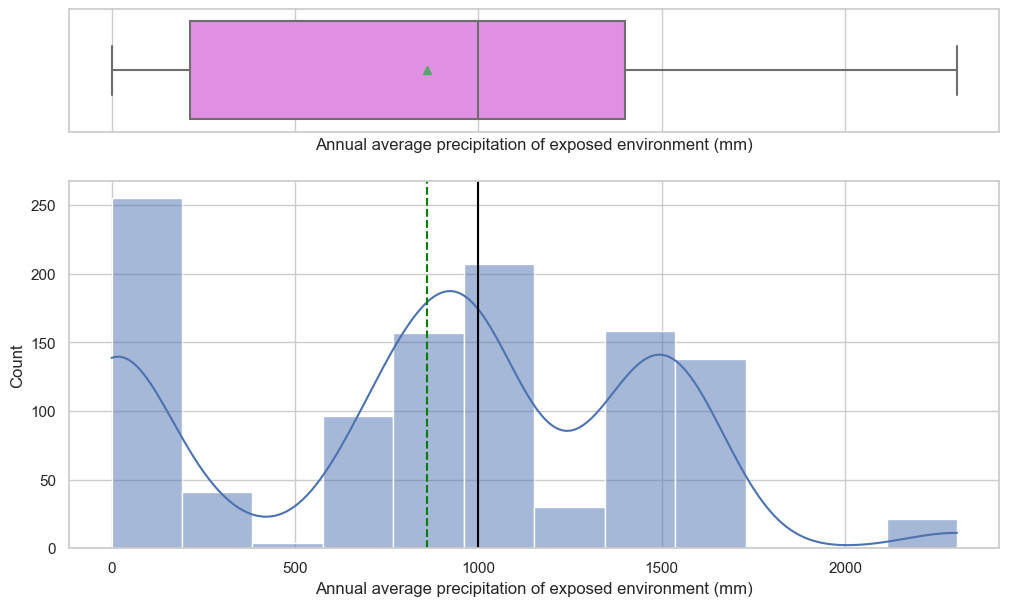

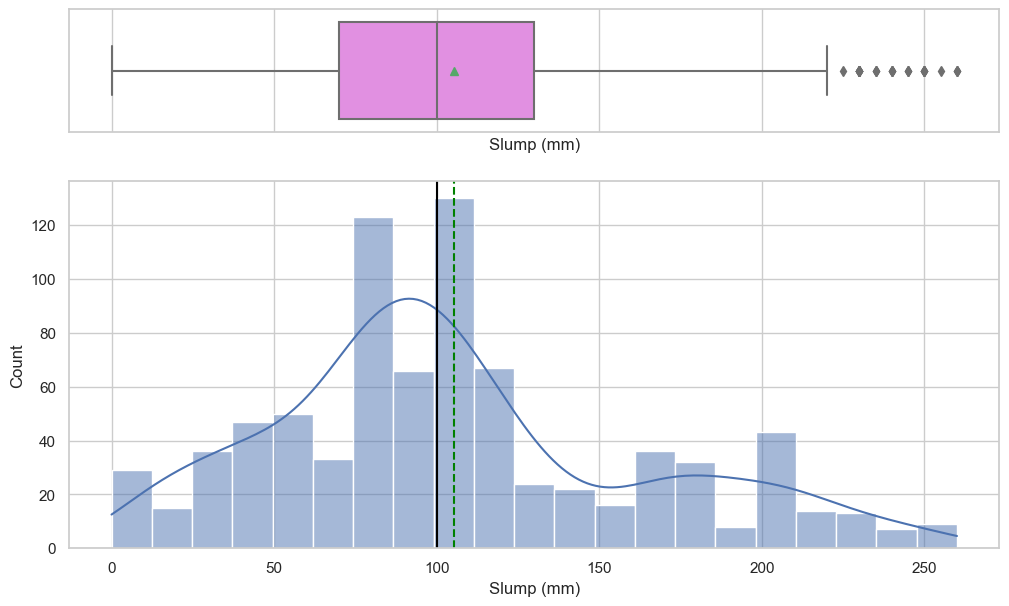

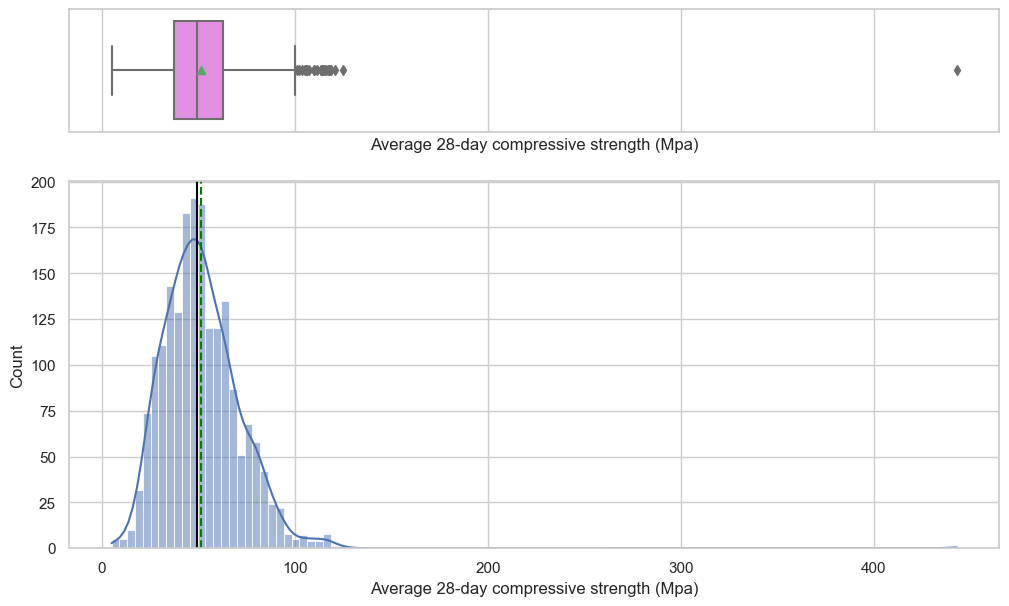

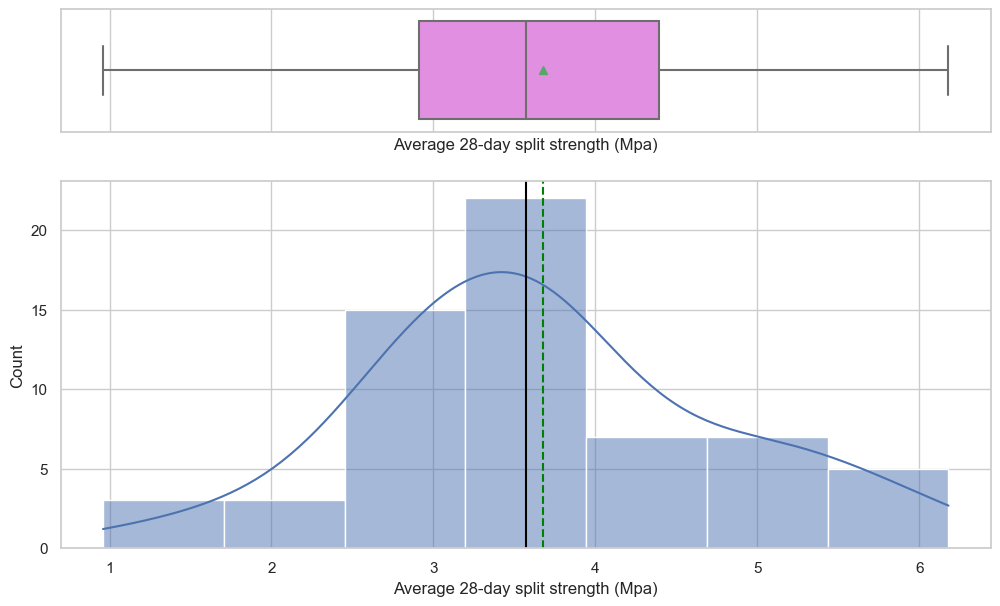

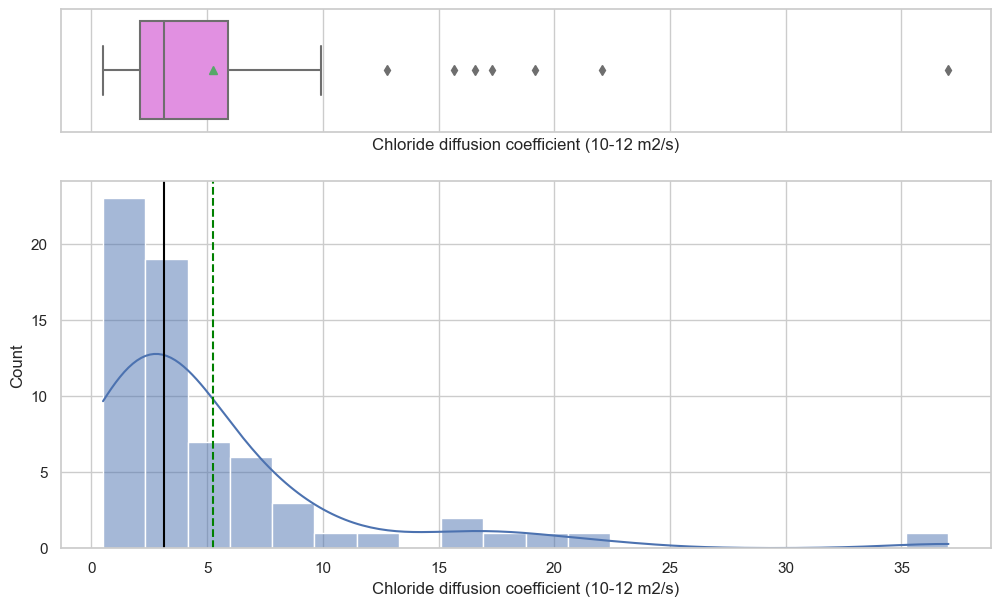

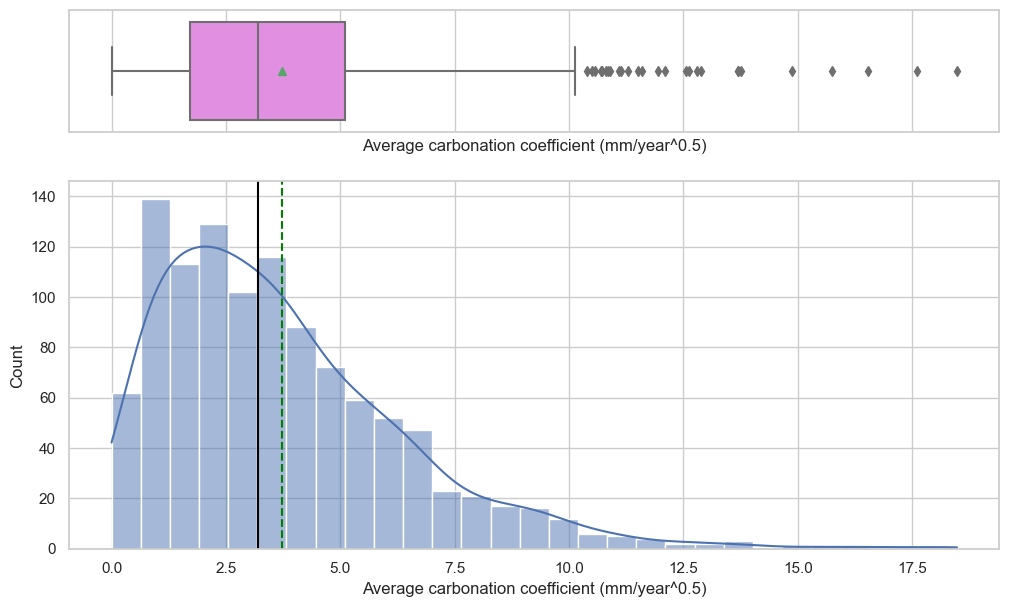

In [46]:
num_frame = df1.select_dtypes(include=np.number)
obj_frame = df1.select_dtypes(include=['object'])

for col in num_frame.columns:
    hist_boxplot(num_frame, col)

In [47]:
# function to create labeled barplots


def labeled_barplot(data, feature, perc=False, n=None):
    """
    Barplot with percentage at the top

    data: dataframe
    feature: dataframe column
    perc: whether to display percentages instead of count (default is False)
    n: displays the top n category levels (default is None, i.e., display all levels)
    """

    total = len(data[feature])  # length of the column
    count = data[feature].nunique()
    if n is None:
        plt.figure(figsize=(count + 1, 5))
    else:
        plt.figure(figsize=(n + 1, 5))

    plt.xticks(rotation=90, fontsize=15)
    ax = sns.countplot(
        data=data,
        x=feature,
        palette="Paired",
        order=data[feature].value_counts().index[:n].sort_values(),
    )

    for p in ax.patches:
        if perc == True:
            label = "{:.1f}%".format(
                100 * p.get_height() / total
            )  # percentage of each class of the category
        else:
            label = p.get_height()  # count of each level of the category

        x = p.get_x() + p.get_width() / 2  # width of the plot
        y = p.get_height()  # height of the plot

        ax.annotate(
            label,
            (x, y),
            ha="center",
            va="center",
            size=12,
            xytext=(0, 5),
            textcoords="offset points",
        )  # annotate the percentage

    plt.show()  # show the plot

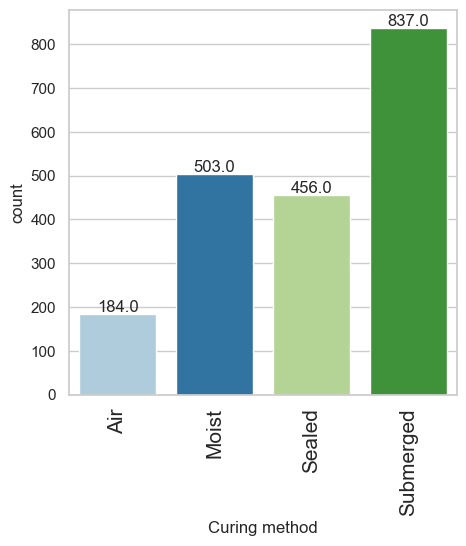

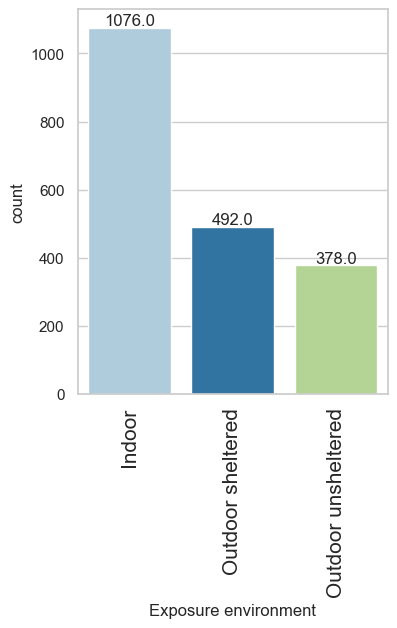

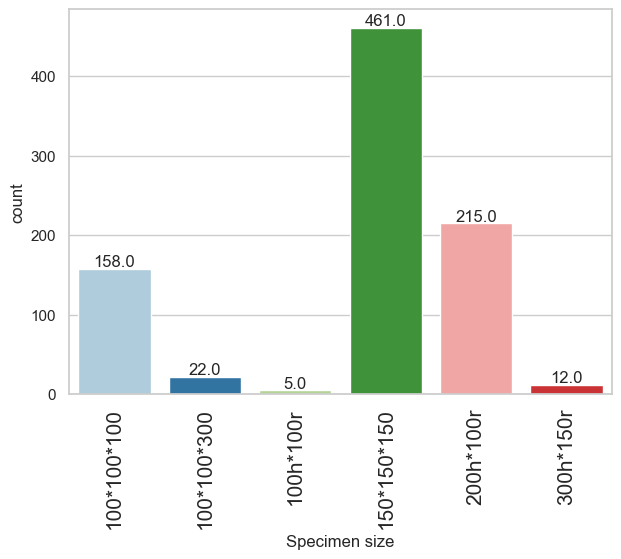

In [48]:
for col in obj_frame:
    labeled_barplot(obj_frame, col)

# Data cleaning

**8 Variables only in the previous model**

Cement (component 1) -- quantitative -- kg in a m3 mixture 
Blast Furnace Slag (component 2) -- quantitative -- kg in a m3 mixture
Fly Ash (component 3) -- quantitative -- kg in a m3 mixture 
Water (component 4) -- quantitative -- kg in a m3 mixture 
Superplasticizer (component 5) -- quantitative -- kg in a m3 mixture 
Coarse Aggregate (component 6) -- quantitative -- kg in a m3 mixture 
Fine Aggregate (component 7) -- quantitative -- kg in a m3 mixture 
Age -- quantitative -- Day (1~365) 
Concrete compressive strength -- quantitative -- MPa

In [49]:
semi_df = df1.iloc[:, list(range(0, 9)) + [10, 11, 23]]
semi_df

,ASTM type 1 ordinary Portland Cement content (kg/m^3),CEM I 42.5N ordinary Portland Cement content (kg/m^3),CEM I 52.5N ordinary Portland Cement content (kg/m^3),Class C Fly ash content (kg/m^3),Class F Fly ash content (kg/m^3),Slag content (kg/m^3),Silica fume content (kg/m^3),Water content (kg/m^3),Superplasticizer content (kg/m^3),Coarse aggregate content (kg/m^3),Fine aggregate content (kg/m^3),Average 28-day compressive strength (Mpa)
0,0.000,0.000,450.000,0.000,0.000,0.000,0.000,180.000,4.000,990.000,800.000,75.930
1,0.000,0.000,400.000,0.000,0.000,0.000,0.000,200.000,3.250,990.000,877.000,64.500
2,0.000,0.000,350.000,0.000,0.000,0.000,0.000,210.000,0.000,1015.000,869.000,49.230
3,0.000,0.000,300.000,0.000,0.000,0.000,0.000,225.000,0.000,1050.000,810.000,36.000
4,0.000,0.000,315.000,0.000,135.000,0.000,0.000,180.000,1.750,990.000,800.000,62.800
...,...,...,...,...,...,...,...,...,...,...,...,...
1983,350.000,0.000,0.000,0.000,0.000,0.000,50.000,180.000,2.000,983.000,806.000,NaN
1984,380.000,0.000,0.000,0.000,0.000,0.000,20.000,200.000,0.800,991.000,793.000,NaN
1985,370.000,0.000,0.000,0.000,0.000,0.000,30.000,200.000,1.200,959.000,784.000,NaN
1986,360.000,0.000,0.000,0.000,0.000,0.000,40.000,200.000,1.800,1020.000,820.000,NaN


In [50]:
# Combine OPC & FA
semi_df['Cement'] = semi_df['ASTM type 1 ordinary Portland Cement content (kg/m^3)'] + semi_df['CEM I 42.5N ordinary Portland Cement content (kg/m^3)'] + semi_df['CEM I 52.5N ordinary Portland Cement content (kg/m^3)']

semi_df['Fly Ash'] = semi_df['Class C Fly ash content (kg/m^3)'] + semi_df['Class F Fly ash content (kg/m^3)']

semi_df


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


,ASTM type 1 ordinary Portland Cement content (kg/m^3),CEM I 42.5N ordinary Portland Cement content (kg/m^3),CEM I 52.5N ordinary Portland Cement content (kg/m^3),Class C Fly ash content (kg/m^3),Class F Fly ash content (kg/m^3),Slag content (kg/m^3),Silica fume content (kg/m^3),Water content (kg/m^3),Superplasticizer content (kg/m^3),Coarse aggregate content (kg/m^3),Fine aggregate content (kg/m^3),Average 28-day compressive strength (Mpa),Cement,Fly Ash
0,0.000,0.000,450.000,0.000,0.000,0.000,0.000,180.000,4.000,990.000,800.000,75.930,450.000,0.000
1,0.000,0.000,400.000,0.000,0.000,0.000,0.000,200.000,3.250,990.000,877.000,64.500,400.000,0.000
2,0.000,0.000,350.000,0.000,0.000,0.000,0.000,210.000,0.000,1015.000,869.000,49.230,350.000,0.000
3,0.000,0.000,300.000,0.000,0.000,0.000,0.000,225.000,0.000,1050.000,810.000,36.000,300.000,0.000
4,0.000,0.000,315.000,0.000,135.000,0.000,0.000,180.000,1.750,990.000,800.000,62.800,315.000,135.000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1983,350.000,0.000,0.000,0.000,0.000,0.000,50.000,180.000,2.000,983.000,806.000,NaN,350.000,0.000
1984,380.000,0.000,0.000,0.000,0.000,0.000,20.000,200.000,0.800,991.000,793.000,NaN,380.000,0.000
1985,370.000,0.000,0.000,0.000,0.000,0.000,30.000,200.000,1.200,959.000,784.000,NaN,370.000,0.000
1986,360.000,0.000,0.000,0.000,0.000,0.000,40.000,200.000,1.800,1020.000,820.000,NaN,360.000,0.000


In [51]:
# Drop rows of SF >0
semi_df = semi_df.loc[semi_df['Silica fume content (kg/m^3)'] <= 0]
semi_df

,ASTM type 1 ordinary Portland Cement content (kg/m^3),CEM I 42.5N ordinary Portland Cement content (kg/m^3),CEM I 52.5N ordinary Portland Cement content (kg/m^3),Class C Fly ash content (kg/m^3),Class F Fly ash content (kg/m^3),Slag content (kg/m^3),Silica fume content (kg/m^3),Water content (kg/m^3),Superplasticizer content (kg/m^3),Coarse aggregate content (kg/m^3),Fine aggregate content (kg/m^3),Average 28-day compressive strength (Mpa),Cement,Fly Ash
0,0.000,0.000,450.000,0.000,0.000,0.000,0.000,180.000,4.000,990.000,800.000,75.930,450.000,0.000
1,0.000,0.000,400.000,0.000,0.000,0.000,0.000,200.000,3.250,990.000,877.000,64.500,400.000,0.000
2,0.000,0.000,350.000,0.000,0.000,0.000,0.000,210.000,0.000,1015.000,869.000,49.230,350.000,0.000
3,0.000,0.000,300.000,0.000,0.000,0.000,0.000,225.000,0.000,1050.000,810.000,36.000,300.000,0.000
4,0.000,0.000,315.000,0.000,135.000,0.000,0.000,180.000,1.750,990.000,800.000,62.800,315.000,135.000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1967,379.000,0.000,0.000,0.000,0.000,0.000,0.000,122.000,3.200,1107.000,737.000,35.000,379.000,0.000
1968,171.000,0.000,0.000,0.000,211.000,0.000,0.000,124.000,5.450,1093.000,734.000,31.600,171.000,211.000
1969,387.000,0.000,0.000,0.000,0.000,0.000,0.000,125.000,5.250,1125.000,753.000,38.700,387.000,0.000
1970,229.000,0.000,0.000,0.000,153.000,0.000,0.000,122.000,5.360,1112.000,745.000,38.900,229.000,153.000


In [52]:
#Drop excess columns
semi_df = semi_df.drop(['ASTM type 1 ordinary Portland Cement content (kg/m^3)', 'CEM I 42.5N ordinary Portland Cement content (kg/m^3)', 'CEM I 52.5N ordinary Portland Cement content (kg/m^3)', 'Class C Fly ash content (kg/m^3)', 'Class F Fly ash content (kg/m^3)', 'Silica fume content (kg/m^3)'], axis = 1)
semi_df

,Slag content (kg/m^3),Water content (kg/m^3),Superplasticizer content (kg/m^3),Coarse aggregate content (kg/m^3),Fine aggregate content (kg/m^3),Average 28-day compressive strength (Mpa),Cement,Fly Ash
0,0.000,180.000,4.000,990.000,800.000,75.930,450.000,0.000
1,0.000,200.000,3.250,990.000,877.000,64.500,400.000,0.000
2,0.000,210.000,0.000,1015.000,869.000,49.230,350.000,0.000
3,0.000,225.000,0.000,1050.000,810.000,36.000,300.000,0.000
4,0.000,180.000,1.750,990.000,800.000,62.800,315.000,135.000
...,...,...,...,...,...,...,...,...
1967,0.000,122.000,3.200,1107.000,737.000,35.000,379.000,0.000
1968,0.000,124.000,5.450,1093.000,734.000,31.600,171.000,211.000
1969,0.000,125.000,5.250,1125.000,753.000,38.700,387.000,0.000
1970,0.000,122.000,5.360,1112.000,745.000,38.900,229.000,153.000


In [53]:
semi_df['Age'] = 28
semi_df

,Slag content (kg/m^3),Water content (kg/m^3),Superplasticizer content (kg/m^3),Coarse aggregate content (kg/m^3),Fine aggregate content (kg/m^3),Average 28-day compressive strength (Mpa),Cement,Fly Ash,Age
0,0.000,180.000,4.000,990.000,800.000,75.930,450.000,0.000,28
1,0.000,200.000,3.250,990.000,877.000,64.500,400.000,0.000,28
2,0.000,210.000,0.000,1015.000,869.000,49.230,350.000,0.000,28
3,0.000,225.000,0.000,1050.000,810.000,36.000,300.000,0.000,28
4,0.000,180.000,1.750,990.000,800.000,62.800,315.000,135.000,28
...,...,...,...,...,...,...,...,...,...
1967,0.000,122.000,3.200,1107.000,737.000,35.000,379.000,0.000,28
1968,0.000,124.000,5.450,1093.000,734.000,31.600,171.000,211.000,28
1969,0.000,125.000,5.250,1125.000,753.000,38.700,387.000,0.000,28
1970,0.000,122.000,5.360,1112.000,745.000,38.900,229.000,153.000,28


In [54]:
# Define the desired column order using column indices
column_indices = [6, 0, 7, 1, 2, 3, 4, 8, 5]  # Specify the indices of columns in the desired order

# Reorder the columns using iloc
new_df = semi_df.iloc[:, column_indices]
new_df

,Cement,Slag content (kg/m^3),Fly Ash,Water content (kg/m^3),Superplasticizer content (kg/m^3),Coarse aggregate content (kg/m^3),Fine aggregate content (kg/m^3),Age,Average 28-day compressive strength (Mpa)
0,450.000,0.000,0.000,180.000,4.000,990.000,800.000,28,75.930
1,400.000,0.000,0.000,200.000,3.250,990.000,877.000,28,64.500
2,350.000,0.000,0.000,210.000,0.000,1015.000,869.000,28,49.230
3,300.000,0.000,0.000,225.000,0.000,1050.000,810.000,28,36.000
4,315.000,0.000,135.000,180.000,1.750,990.000,800.000,28,62.800
...,...,...,...,...,...,...,...,...,...
1967,379.000,0.000,0.000,122.000,3.200,1107.000,737.000,28,35.000
1968,171.000,0.000,211.000,124.000,5.450,1093.000,734.000,28,31.600
1969,387.000,0.000,0.000,125.000,5.250,1125.000,753.000,28,38.700
1970,229.000,0.000,153.000,122.000,5.360,1112.000,745.000,28,38.900


In [55]:
column_mapping = {'Cement': 'cement', 'Slag content (kg/m^3)':'blast_furnace_slag','Fly Ash': 'fly_ash', 'Water content (kg/m^3)':'water', 
                  'Superplasticizer content (kg/m^3)': 'superplasticizer', 'Coarse aggregate content (kg/m^3)': 'coarse_aggregate',
                  'Fine aggregate content (kg/m^3)': 'fine_aggregate ', 'Age': 'age', 'Average 28-day compressive strength (Mpa)':'concrete_compressive_strength'}
                                                    
new_df = new_df.rename(columns = column_mapping)
new_df

,cement,blast_furnace_slag,fly_ash,water,superplasticizer,coarse_aggregate,fine_aggregate,age,concrete_compressive_strength
0,450.000,0.000,0.000,180.000,4.000,990.000,800.000,28,75.930
1,400.000,0.000,0.000,200.000,3.250,990.000,877.000,28,64.500
2,350.000,0.000,0.000,210.000,0.000,1015.000,869.000,28,49.230
3,300.000,0.000,0.000,225.000,0.000,1050.000,810.000,28,36.000
4,315.000,0.000,135.000,180.000,1.750,990.000,800.000,28,62.800
...,...,...,...,...,...,...,...,...,...
1967,379.000,0.000,0.000,122.000,3.200,1107.000,737.000,28,35.000
1968,171.000,0.000,211.000,124.000,5.450,1093.000,734.000,28,31.600
1969,387.000,0.000,0.000,125.000,5.250,1125.000,753.000,28,38.700
1970,229.000,0.000,153.000,122.000,5.360,1112.000,745.000,28,38.900


In [56]:
new_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1693 entries, 0 to 1971
Data columns (total 9 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   cement                         1693 non-null   float64
 1   blast_furnace_slag             1693 non-null   float64
 2   fly_ash                        1693 non-null   float64
 3   water                          1693 non-null   float64
 4   superplasticizer               1693 non-null   float64
 5   coarse_aggregate               1690 non-null   float64
 6   fine_aggregate                 1690 non-null   float64
 7   age                            1693 non-null   int64  
 8   concrete_compressive_strength  1669 non-null   float64
dtypes: float64(8), int64(1)
memory usage: 132.3 KB


In [57]:
new_df.dropna(inplace = True)
new_df.isnull().sum()

cement                           0
blast_furnace_slag               0
fly_ash                          0
water                            0
superplasticizer                 0
coarse_aggregate                 0
fine_aggregate                   0
age                              0
concrete_compressive_strength    0
dtype: int64

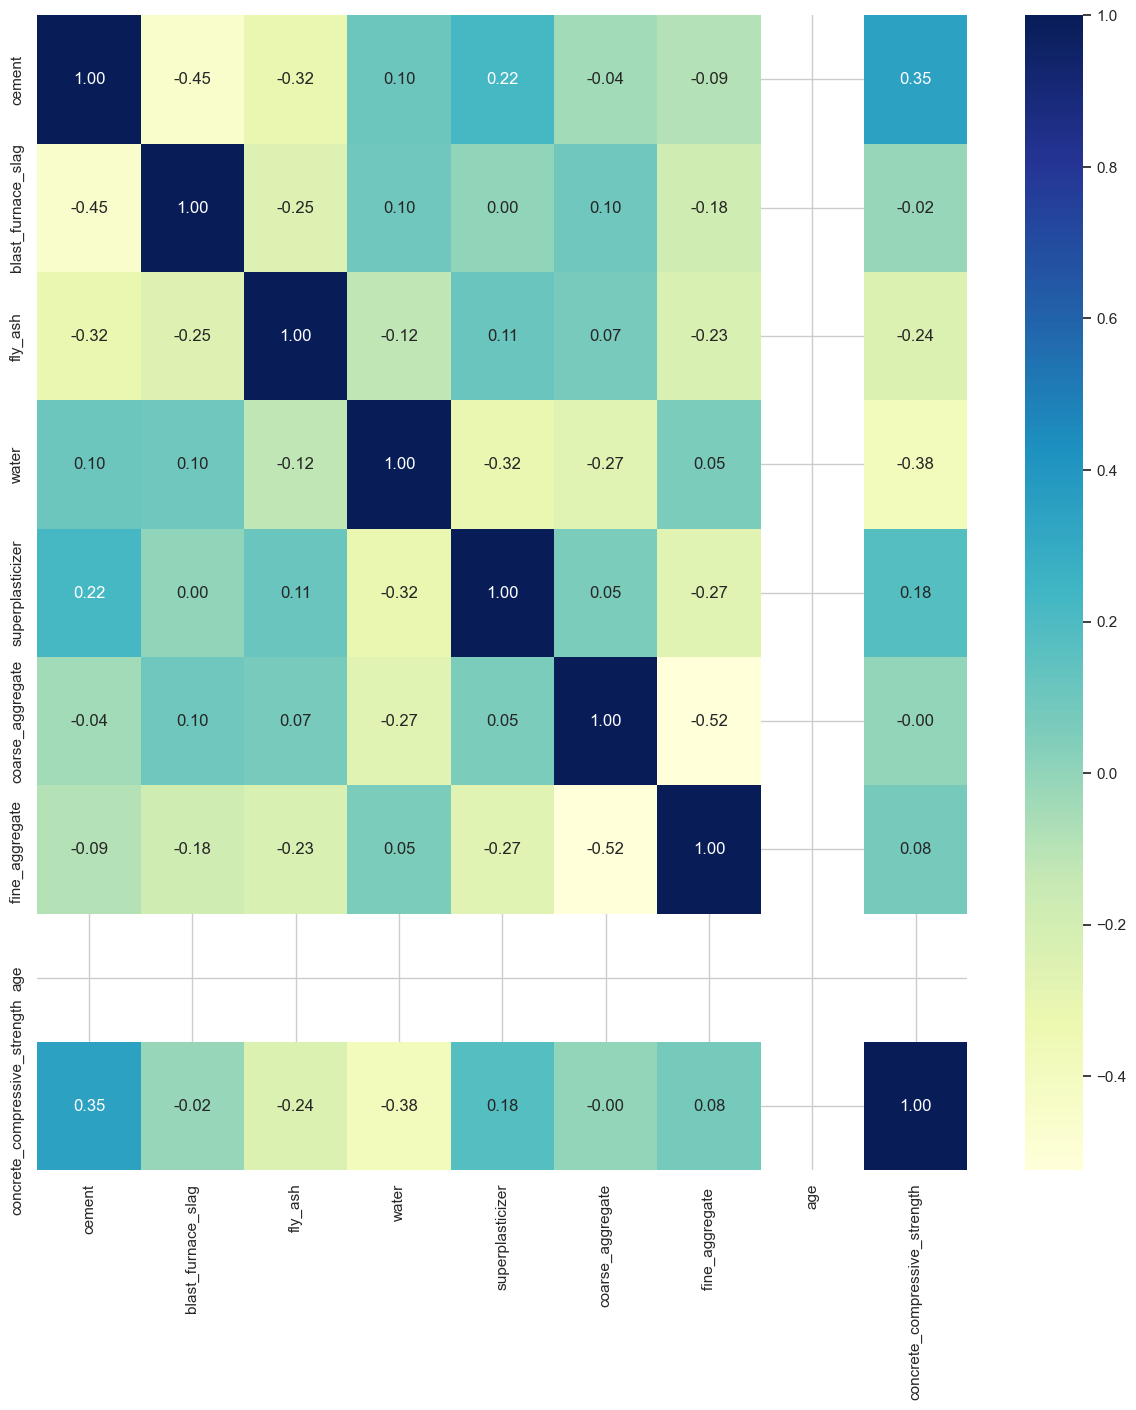

In [58]:
plt.figure(figsize= (15, 15))
sns.heatmap(new_df.corr(), annot = True, fmt = '.2f', cmap = 'YlGnBu')
plt.show()

# Feed to Random Forest

In [59]:
x = new_df.drop(['concrete_compressive_strength'], axis = 1)
y = new_df['concrete_compressive_strength']

In [60]:
Tuned_forest_result_new = Tuned_forest.predict(x)
tuned_forest_train_new = model_performance_regression(x, y, Tuned_forest_result_new)
tuned_forest_train_new

,RMSE,MAE,R-squared,Adj. R-squared
0,19.564,13.975,-0.017,-0.021


In [61]:
new_df_predictions = pd.DataFrame({'True Values': y, 'Predicted Values': Tuned_forest_result_new})
new_df_predictions

,True Values,Predicted Values
0,75.930,65.373
1,64.500,40.734
2,49.230,31.164
3,36.000,31.164
4,62.800,31.164
...,...,...
1967,35.000,65.373
1968,31.600,42.202
1969,38.700,65.373
1970,38.900,42.202


In [62]:
new_df_predictions['Difference'] = new_df_predictions['True Values']-new_df_predictions['Predicted Values']
new_df_predictions

,True Values,Predicted Values,Difference
0,75.930,65.373,10.557
1,64.500,40.734,23.766
2,49.230,31.164,18.066
3,36.000,31.164,4.836
4,62.800,31.164,31.636
...,...,...,...
1967,35.000,65.373,-30.373
1968,31.600,42.202,-10.602
1969,38.700,65.373,-26.673
1970,38.900,42.202,-3.302


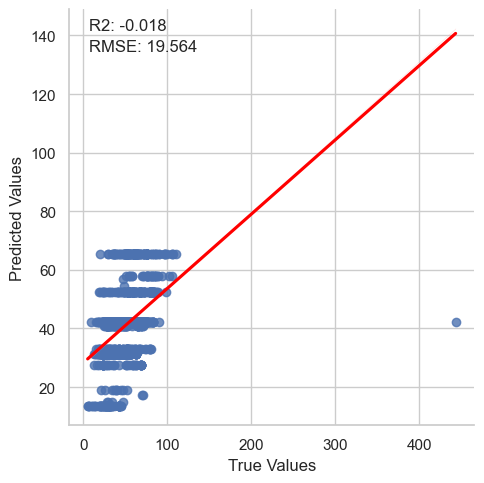

In [63]:
r2 = r2_score(new_df_predictions['True Values'], new_df_predictions['Predicted Values'])
n1=len(new_df_predictions['True Values'])
k1=len(new_df_predictions.columns)
adjr2score = 1 - ((1 - r2) * (n1 - 1) / (n1 - k1 - 1))
rmse = mean_squared_error(new_df_predictions['True Values'], new_df_predictions['Predicted Values'], squared=False)

sns.set(style="whitegrid")
lm_plot = sns.lmplot(data=new_df_predictions, x='True Values', y='Predicted Values', ci=True, line_kws={'color': 'red'})

plt.text(0.05, 0.95, f'R2: {adjr2score:.3f}', transform=plt.gca().transAxes)
plt.text(0.05, 0.9, f'RMSE: {rmse:.3f}', transform=plt.gca().transAxes)

plt.show()